In [2]:
from __future__ import absolute_import, division, print_function

import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn import tree
from sklearn import linear_model
import warnings
import seaborn as sns
import matplotlib
from tensorflow.keras import regularizers
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


warnings.filterwarnings(action='once')

In [4]:
# Dataset import
dataset_path = r'C:\Users\gbian007\Google Drive\Research\UHTC\Database&Model\Model\Dataset.csv'
#column_names = ['ZrB2', 'HfB2', 'TaB2', 'SiC', 'Ta', 'TaC', 'Mo', 'B4C', 'Si3N4', 'Ta5Si3', 'TaSi2', 'ZrO2', 'Mosi2',
#                'WC', 'WB', 'ZrSi2', 'CrB2', 'LaB6', 'La2O3', 'Gd2O3', 'HfSi2', 'C', 'HfC', 'BN', 'TiSi2',
#                'Sintering Method', 'Sintering Temperature', 'Sintering Pressure (Mpa)', 'Sintering Time (min)',
#                'Relative Density (%)', 'Temperature (C)', 'Holding Time (min)', 'Oxide Thickness (um)']
#column_names = ['Composition', 'Sintering Method', 'Sintering Temperature ©', 'Sintering Pressure (Mpa)',
#                'Sintering Time (min)','SintCond','Mean Grain Size (um)', 'Relative Density (%)',
#                'Oxidation Test', 'Temperature (C)','Time@Temp (s)','Time@Temp (min)', 'Atmospheric Condition',
#                'Flow Rate (cm3/min)','Oxide Thickness (um)','Mass Gain (mg/cm2)']

raw_dataset = pd.read_csv(dataset_path, na_values="?", comment='\t', sep=",", skipinitialspace=True, encoding='cp1252')
dataset = raw_dataset.copy()
composition = dataset["Composition"].str.split("-", n = 4, expand = True)
dataset['Relative Density (%)'] = dataset['Relative Density (%)'].astype(float)
dataset['Oxide Thickness (um)'] = dataset['Oxide Thickness (um)'].astype(float)
dataset = dataset.drop(columns=['Composition'])
dataset = dataset.drop(columns=['Mass Gain (mg/cm2)'])
dataset.dtypes
dataset

ZrB2  HfB2  TaB2  SiC        Sintering Method  Sintering Temperature ©  \
0     0.0   0.8     0  0.2             Hot pressed                   2000.0   
1     0.0   0.8     0  0.2             Hot pressed                   2000.0   
2     0.8   0.0     0  0.2             Hot pressed                   1900.0   
3     0.8   0.0     0  0.2             Hot pressed                   2000.0   
4     0.8   0.0     0  0.2             Hot pressed                   2000.0   
..    ...   ...   ...  ...                     ...                      ...   
102   0.0   0.8     0  0.2  Spark Plasma Sintering                   2100.0   
103   0.0   0.8     0  0.2  Spark Plasma Sintering                   2100.0   
104   0.9   0.0     0  0.1             Hot pressed                   2000.0   
105   0.8   0.0     0  0.2             Hot pressed                   2000.0   
106   0.7   0.0     0  0.3             Hot pressed                   2000.0   

     Sintering Pressure (Mpa)  Sintering Time (min)  Mean Grain Size (um)  \
0                        30.0                  30.0                   NaN   
1                        30.0                  30.0                   NaN   
2                        30.0                  30.0                  2.00   
3                        30.0                  30.0                   NaN   
4                        30.0                  30.0                   NaN   
..                        ...                   ...                   ...   
102                      32.0                  17.0                  2.50   
103                      32.0                  17.0                  2.50   
104                      30.0                  60.0                  8.62   
105                      30.0                  60.0                  3.89   
106                      30.0                  60.0                  7.50   

     Relative Density (%)  ...      Sintering Method.1  \
0                   96.00  ...  Spark Plasma Sintering   
1                   96.00  ...  Spark Plasma Sintering   
2                     NaN  ...             hot pressed   
3                   99.00  ...  Spark Plasme Sintering   
4                   99.00  ...  Spark Plasma Sintering   
..                    ...  ...                     ...   
102                 99.51  ...                     NaN   
103                 99.00  ...                     NaN   
104                100.00  ...                     NaN   
105                 98.00  ...                     NaN   
106                100.00  ...                     NaN   

     Sintering Temperature ©.1  Sintering Pressure (Mpa).1  \
0                       2100.0                        50.0   
1                       1800.0                       100.0   
2                       2000.0                        25.0   
3                       1850.0                         NaN   
4                       2100.0                        32.0   
..                         ...                         ...   
102                        NaN                         NaN   
103                        NaN                         NaN   
104                        NaN                         NaN   
105                        NaN                         NaN   
106                        NaN                         NaN   

     Sintering Time (min).1  Mean Grain Size (um).1 Relative Density (%).1  \
0                       5.0                    12.0                   99.2   
1                      10.0                     4.7                  100.0   
2                      60.0                     8.5                   96.0   
3                      10.0                     2.3                   94.0   
4                       9.0                     2.6                   99.9   
..                      ...                     ...                    ...   
102                     NaN                     NaN                    NaN   
103                     NaN                     NaN              

In [581]:
#  Clean Dataset
dataset = dataset.dropna(subset=['Oxide Thickness (um)'])
dataset.isna().sum()
dataset
#dataset=dataset.drop(columns=['Sintering Temperature', 'Sintering Pressure (Mpa)',
 #                             'Sintering Time (min)'])

ZrB2   HfB2  TaB2   SiC   Ta  TaC  Mo  B4C  Si3N4  Ta5Si3  ...  TiSi2  \
0     0.0  100.0   0.0   0.0  0.0    0   0  0.0    0.0       0  ...      0   
3     0.0   90.0   0.0  10.0  0.0    0   0  0.0    0.0       0  ...      0   
4     0.0   85.0   0.0  15.0  0.0    0   0  0.0    0.0       0  ...      0   
5     0.0   85.0   0.0  15.0  0.0    0   0  0.0    0.0       0  ...      0   
6     0.0   85.0   0.0  15.0  0.0    0   0  0.0    0.0       0  ...      0   
..    ...    ...   ...   ...  ...  ...  ..  ...    ...     ...  ...    ...   
285  50.0    0.0   0.0  50.0  0.0    0   0  0.0    0.0       0  ...      0   
286  50.0    0.0   0.0  50.0  0.0    0   0  0.0    0.0       0  ...      0   
287  50.0    0.0   0.0  50.0  0.0    0   0  0.0    0.0       0  ...      0   
290  35.0    0.0   0.0  65.0  0.0    0   0  0.0    0.0       0  ...      0   
302  20.0    0.0   0.0  80.0  0.0    0   0  0.0    0.0       0  ...      0   

           Sintering Method  Sintering Temperature ©  \
0    Spark Plasma Sintering                   2100.0   
3    Spark Plasma Sintering                   1800.0   
4    Spark Plasma Sintering                   2100.0   
5    Spark Plasma Sintering                   2100.0   
6    Spark Plasma Sintering                   2100.0   
..                      ...                      ...   
285             Hot pressed                   1900.0   
286             Hot pressed                   1900.0   
287             Hot pressed                   1900.0   
290             Hot pressed                   1700.0   
302  Spark Plasma Sintering                   2100.0   

     Sintering Pressure (Mpa)  Sintering Time (min)  Mean Grain Size (um)  \
0                        50.0                   5.0                  12.0   
3                       100.0                  10.0                   4.7   
4                        32.0                   9.0                   2.6   
5                        32.0                   9.0                   2.6   
6                        32.0                   9.0                   2.6   
..                        ...                   ...                   ...   
285                      35.0                 120.0                   3.9   
286                      35.0                 120.0                   3.9   
287                      35.0                 120.0                   3.9   
290                       7.0                 600.0                   NaN   
302                      50.0                   5.0                   NaN   

     Relative Density (%)  Temperature (C)  Time@Temp (min)  \
0                    99.2          1400.00            60.00   
3                   100.0          1526.85            20.00   
4                    99.9          2000.00            30.00   
5                    99.9          1800.00            30.00   
6                    99.9          1600.00            30.00   
..                    ...              ...              ...   
285                  63.9          1300.00            16.67   
286                  63.9          1300.00            33.33   
287                  63.9          1300.00            58.33   
290                  92.0          1500.00          3000.00   
302                  92.0          1500.00          3000.00   

     Oxide Thickness (um)  
0                   248.0  
3                    10.0  
4                   826.0  
5                    78.0  
6                    35.0  
..                    ...  
285                  20.0  
286                  21.0  
287                  22.0  
290                 290.0  
302                 380.0  

[164 rows x 34 columns]

In [582]:
def plot4d (X,Y,s,color):
    fig, ax = plt.subplots(dpi=400)
    v,x = pd.factorize(color) # Sintering method cond: tempe
    colors = ['darkgreen', 'darkblue', 'red']
    scatter = ax.scatter(x=X, #Relative density cond: tempe
                     y=Y, #Temperature cond: tempe
                     s=s,
                     c=v,
                     cmap=matplotlib.colors.ListedColormap(colors),
                     alpha=0.1)
    # Produce a legend
    p,idx = scatter.legend_elements()
    le=(p,x.values)
    legend1 = ax.legend(*le,
                    loc="upper right", title="Sint. method",framealpha=0.5,fancybox=True,
                    title_fontsize='small',labelspacing=0.5,fontsize='x-small')
    ax.add_artist(legend1)
    return scatter

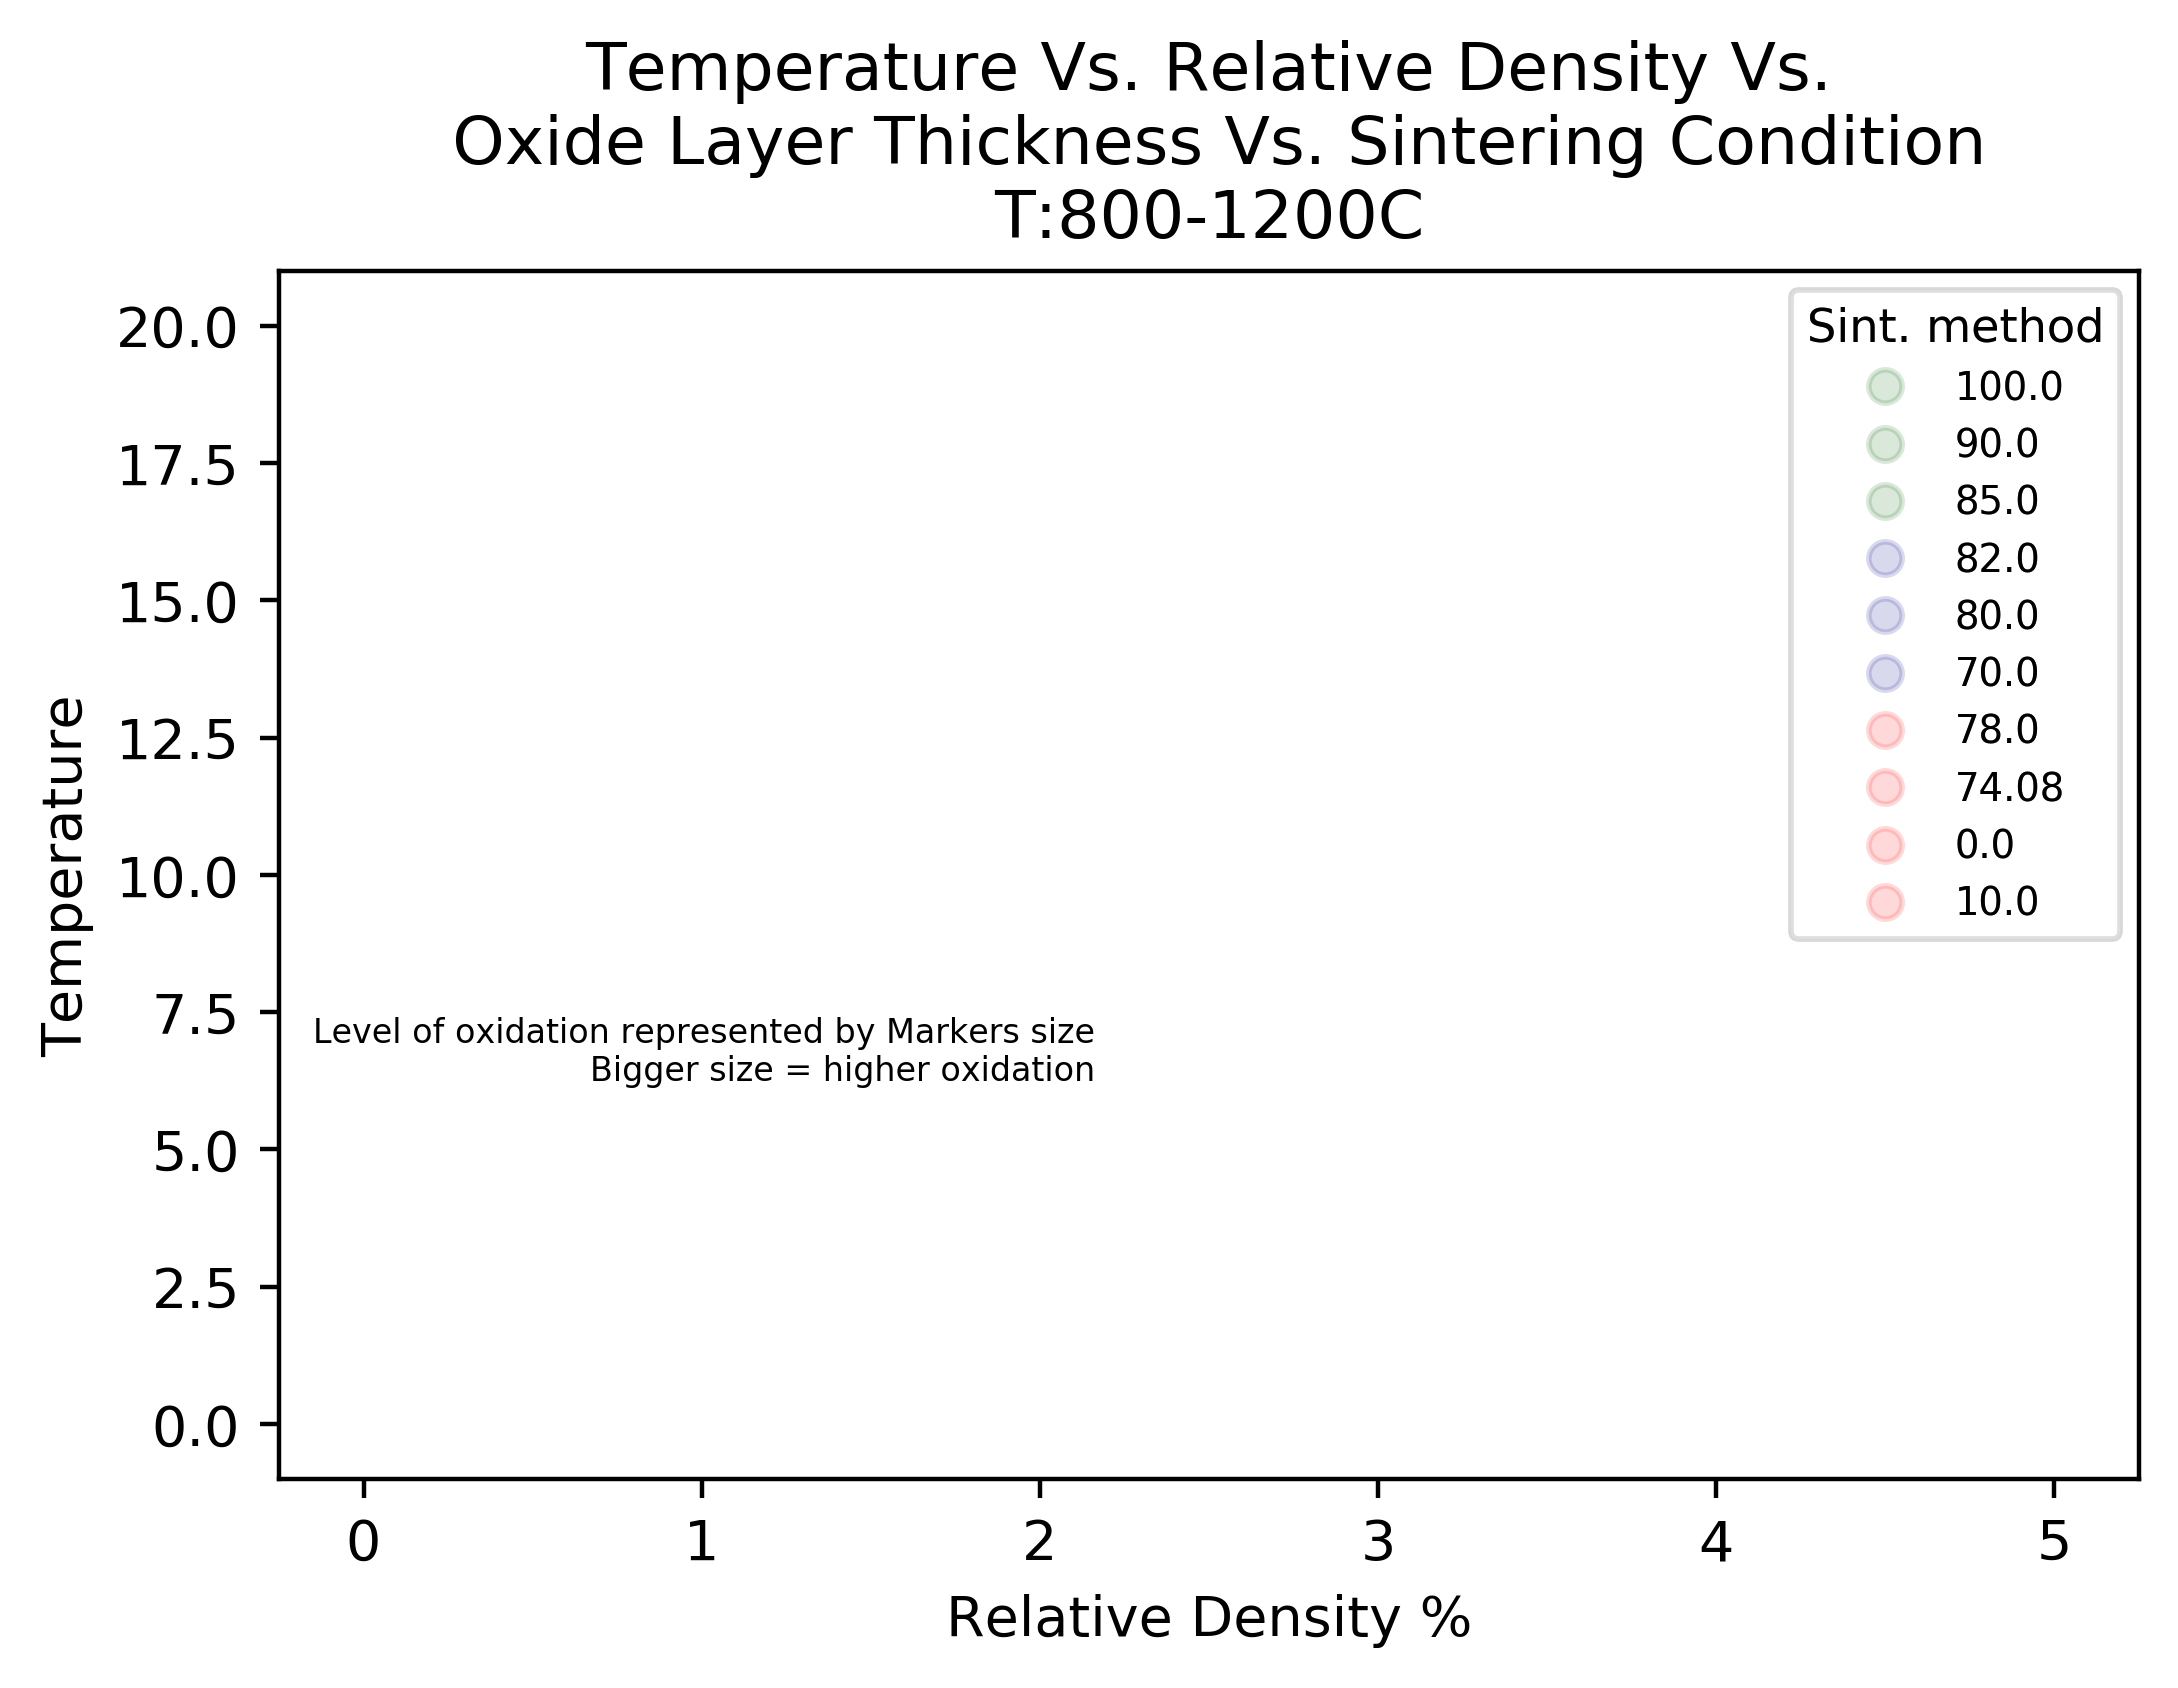

In [583]:

x=dataset[dataset.iloc[:,8] <= 1200 ].iloc[:,7].values #X: RD
y=dataset[dataset.iloc[:,8] <= 1200 ].iloc[:,8].values #Y: Temp
s=dataset[dataset.iloc[:,8] <= 1200 ].iloc[:,11].values*10 # testing method #oxide layer thickness
color=dataset[dataset.iloc[:,8] <= 1200].iloc[:,1]                                           
scatter = plot4d(x,y,s,color)

plt.xlabel('Relative Density %')
plt.ylabel('Temperature')
plt.title('Temperature Vs. Relative Density Vs.\n Oxide Layer Thickness Vs. Sintering Condition\nT:800-1200C')
plt.text(0.035,0, 'Level of oxidation represented by Markers size\nBigger size = higher oxidation',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=6)
#plt.xlim(94,101)
plt.savefig('TvsRDvsOT.pdf')
plt.show()

ValueError: zero-size array to reduction operation minimum which has no identity

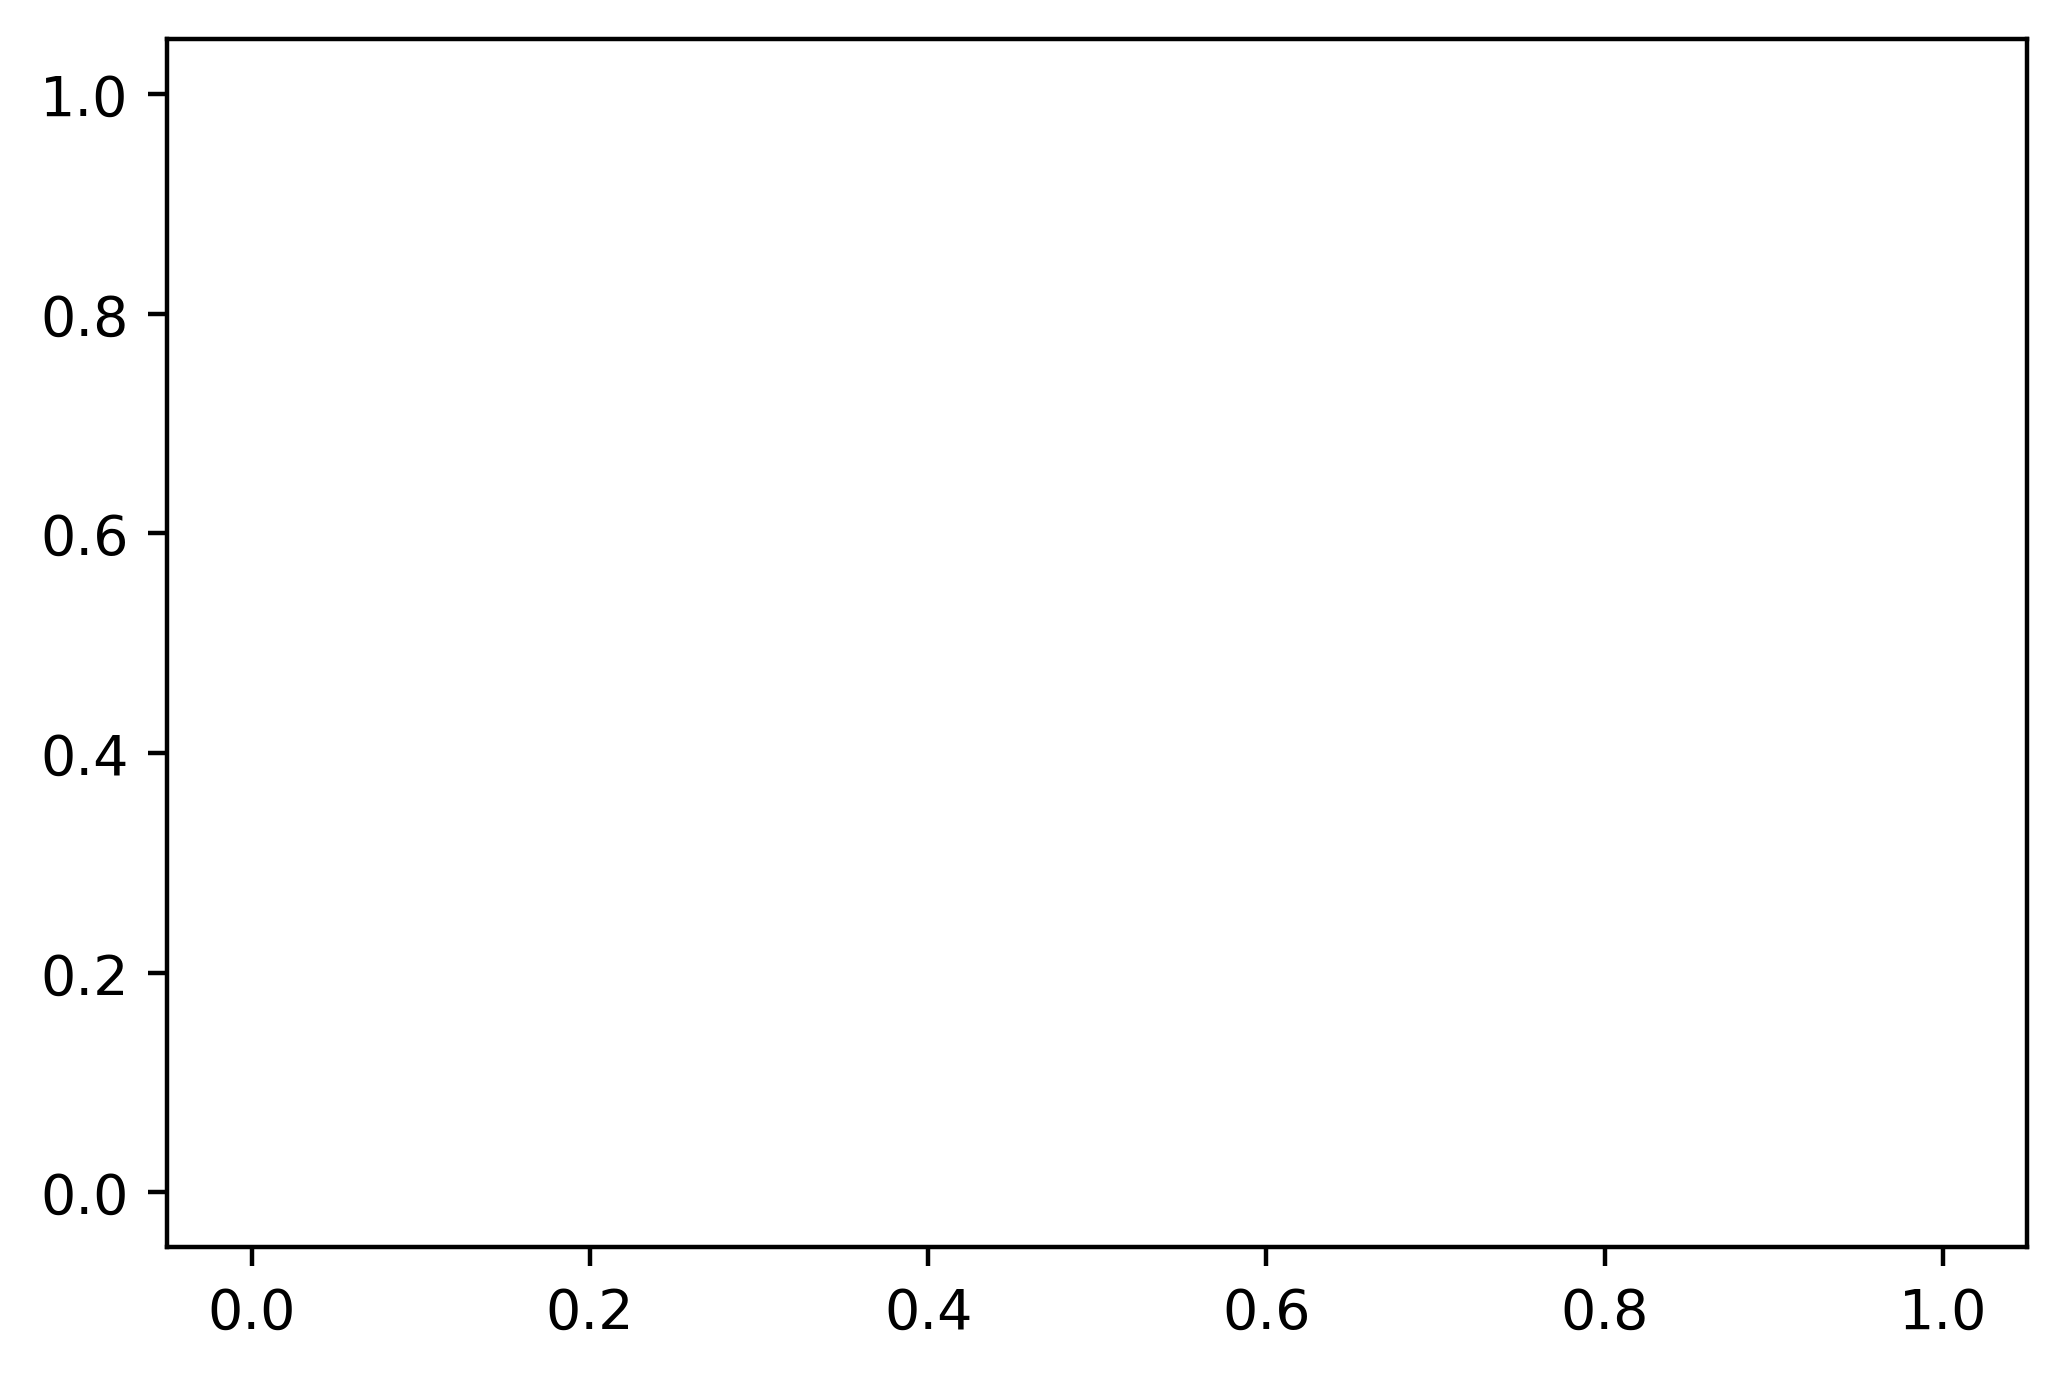

In [584]:
x=dataset[(dataset.iloc[:,8] > 1200) & (dataset.iloc[:,8] <= 1600)].iloc[:,7].values #X: RD
y=dataset[(dataset.iloc[:,8] > 1200) & (dataset.iloc[:,8] <= 1600)].iloc[:,8].values #Y: Temp
s=dataset[(dataset.iloc[:,8] > 1200) & (dataset.iloc[:,8] <= 1600)].iloc[:,11].values*3 # testing method #oxide layer thickness
color=dataset[(dataset.iloc[:,8] > 1200) & (dataset.iloc[:,8] <= 1600)].iloc[:,1]                                           
scatter = plot4d(x,y,s,color) 
                                               
plt.xlabel('Relative Density %')
plt.ylabel('Temperature')
plt.title('Temperature Vs. Relative Density Vs.\n Oxide Layer Thickness Vs. Sintering Condition\nT:1200-1600C')
plt.text(0.0, 0.15, 'Level of oxidation represented by Markers size\nBigger size = higher oxidation',
        verticalalignment='top', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=4)
plt.xlim(94,101)
#plt.savefig('TvsRDvsOT.pdf')
plt.show()

In [ ]:
x=dataset[(dataset.iloc[:,8] > 1600)].iloc[:,7].values #X: RD
y=dataset[(dataset.iloc[:,8] > 1600)].iloc[:,8].values #Y: Temp
s=dataset[(dataset.iloc[:,8] > 1600)].iloc[:,11].values*3 # testing method #oxide layer thickness
color=dataset[(dataset.iloc[:,8] > 1600)].iloc[:,1]                                           
scatter = plot4d(x,y,s,color) 
                                               
plt.xlabel('Relative Density %')
plt.ylabel('Temperature')
plt.title('Temperature Vs. Relative Density Vs.\n Oxide Layer Thickness Vs. Sintering Condition\nT:1600-2200C')
plt.text(0.22, 0.15, 'Level of oxidation represented by Markers size\nBigger size = higher oxidation',
        verticalalignment='top', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=4)
plt.xlim(94,101)
plt.savefig('TvsRDvsOT.pdf')
plt.show()

In [ ]:

dataset.plot.hexbin(x='Relative Density (%)',
                    y='Temperature (C)',
                    C='Oxide Thickness (um)',
                    gridsize=26)
plt.xlabel('Relative Density %')
plt.ylabel('Temperature')
plt.show()

In [ ]:
x=dataset['Time@Temp (min)']
y=dataset['Temperature (C)']
s=dataset['Oxide Thickness (um)'].values*2 # testing method #oxide layer thickness
color=dataset['Sintering Method']                                         
scatter = plot4d(x,y,s,color) 
plt.title('Temperature Vs. Relative Density Vs.\n Oxide Layer Thickness Vs. Sintering Condition\nT:800-1200C')
plt.text(0.04, -0.035, 'Level of oxidation represented by Markers size\nBigger size = higher oxidation',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=6)
plt.xlabel('Holding Time (min)')
plt.ylabel('Temperature')
plt.title('Temp Vs. Holding Time Vs. Oxide Layer Thickness Vs. Sintering Condition')

plt.xlim(-10,300)
plt.savefig('TvsHTvsOT.pdf')
plt.show()

In [ ]:

x=dataset['Relative Density (%)'] #X: RD
y=dataset['Mean Grain Size (um)'] #Y: Temp
s=dataset['Oxide Thickness (um)'].values*3 # testing method #oxide layer thickness
color=dataset['Sintering Method']                                           
scatter = plot4d(x,y,s,color) 
                                               

plt.ylim(0,15)
plt.xlim(95,101)
plt.xlabel('Relative Density (%)')
plt.ylabel('Mean Grain Size (um)')
plt.title('Relative Density (%) Vs. Mean Grain Size (um) Vs.\n Oxide Layer Thickness Vs. Sintering Condition')
plt.text(0.035, -0.035, 'Level of oxidation represented by Markers size\nBigger size = higher oxidation',
        verticalalignment='bottom', horizontalalignment='left',
        transform=ax.transAxes,
        color='black', fontsize=6)
plt.savefig('RDvsGSvsOT.pdf')
plt.show()

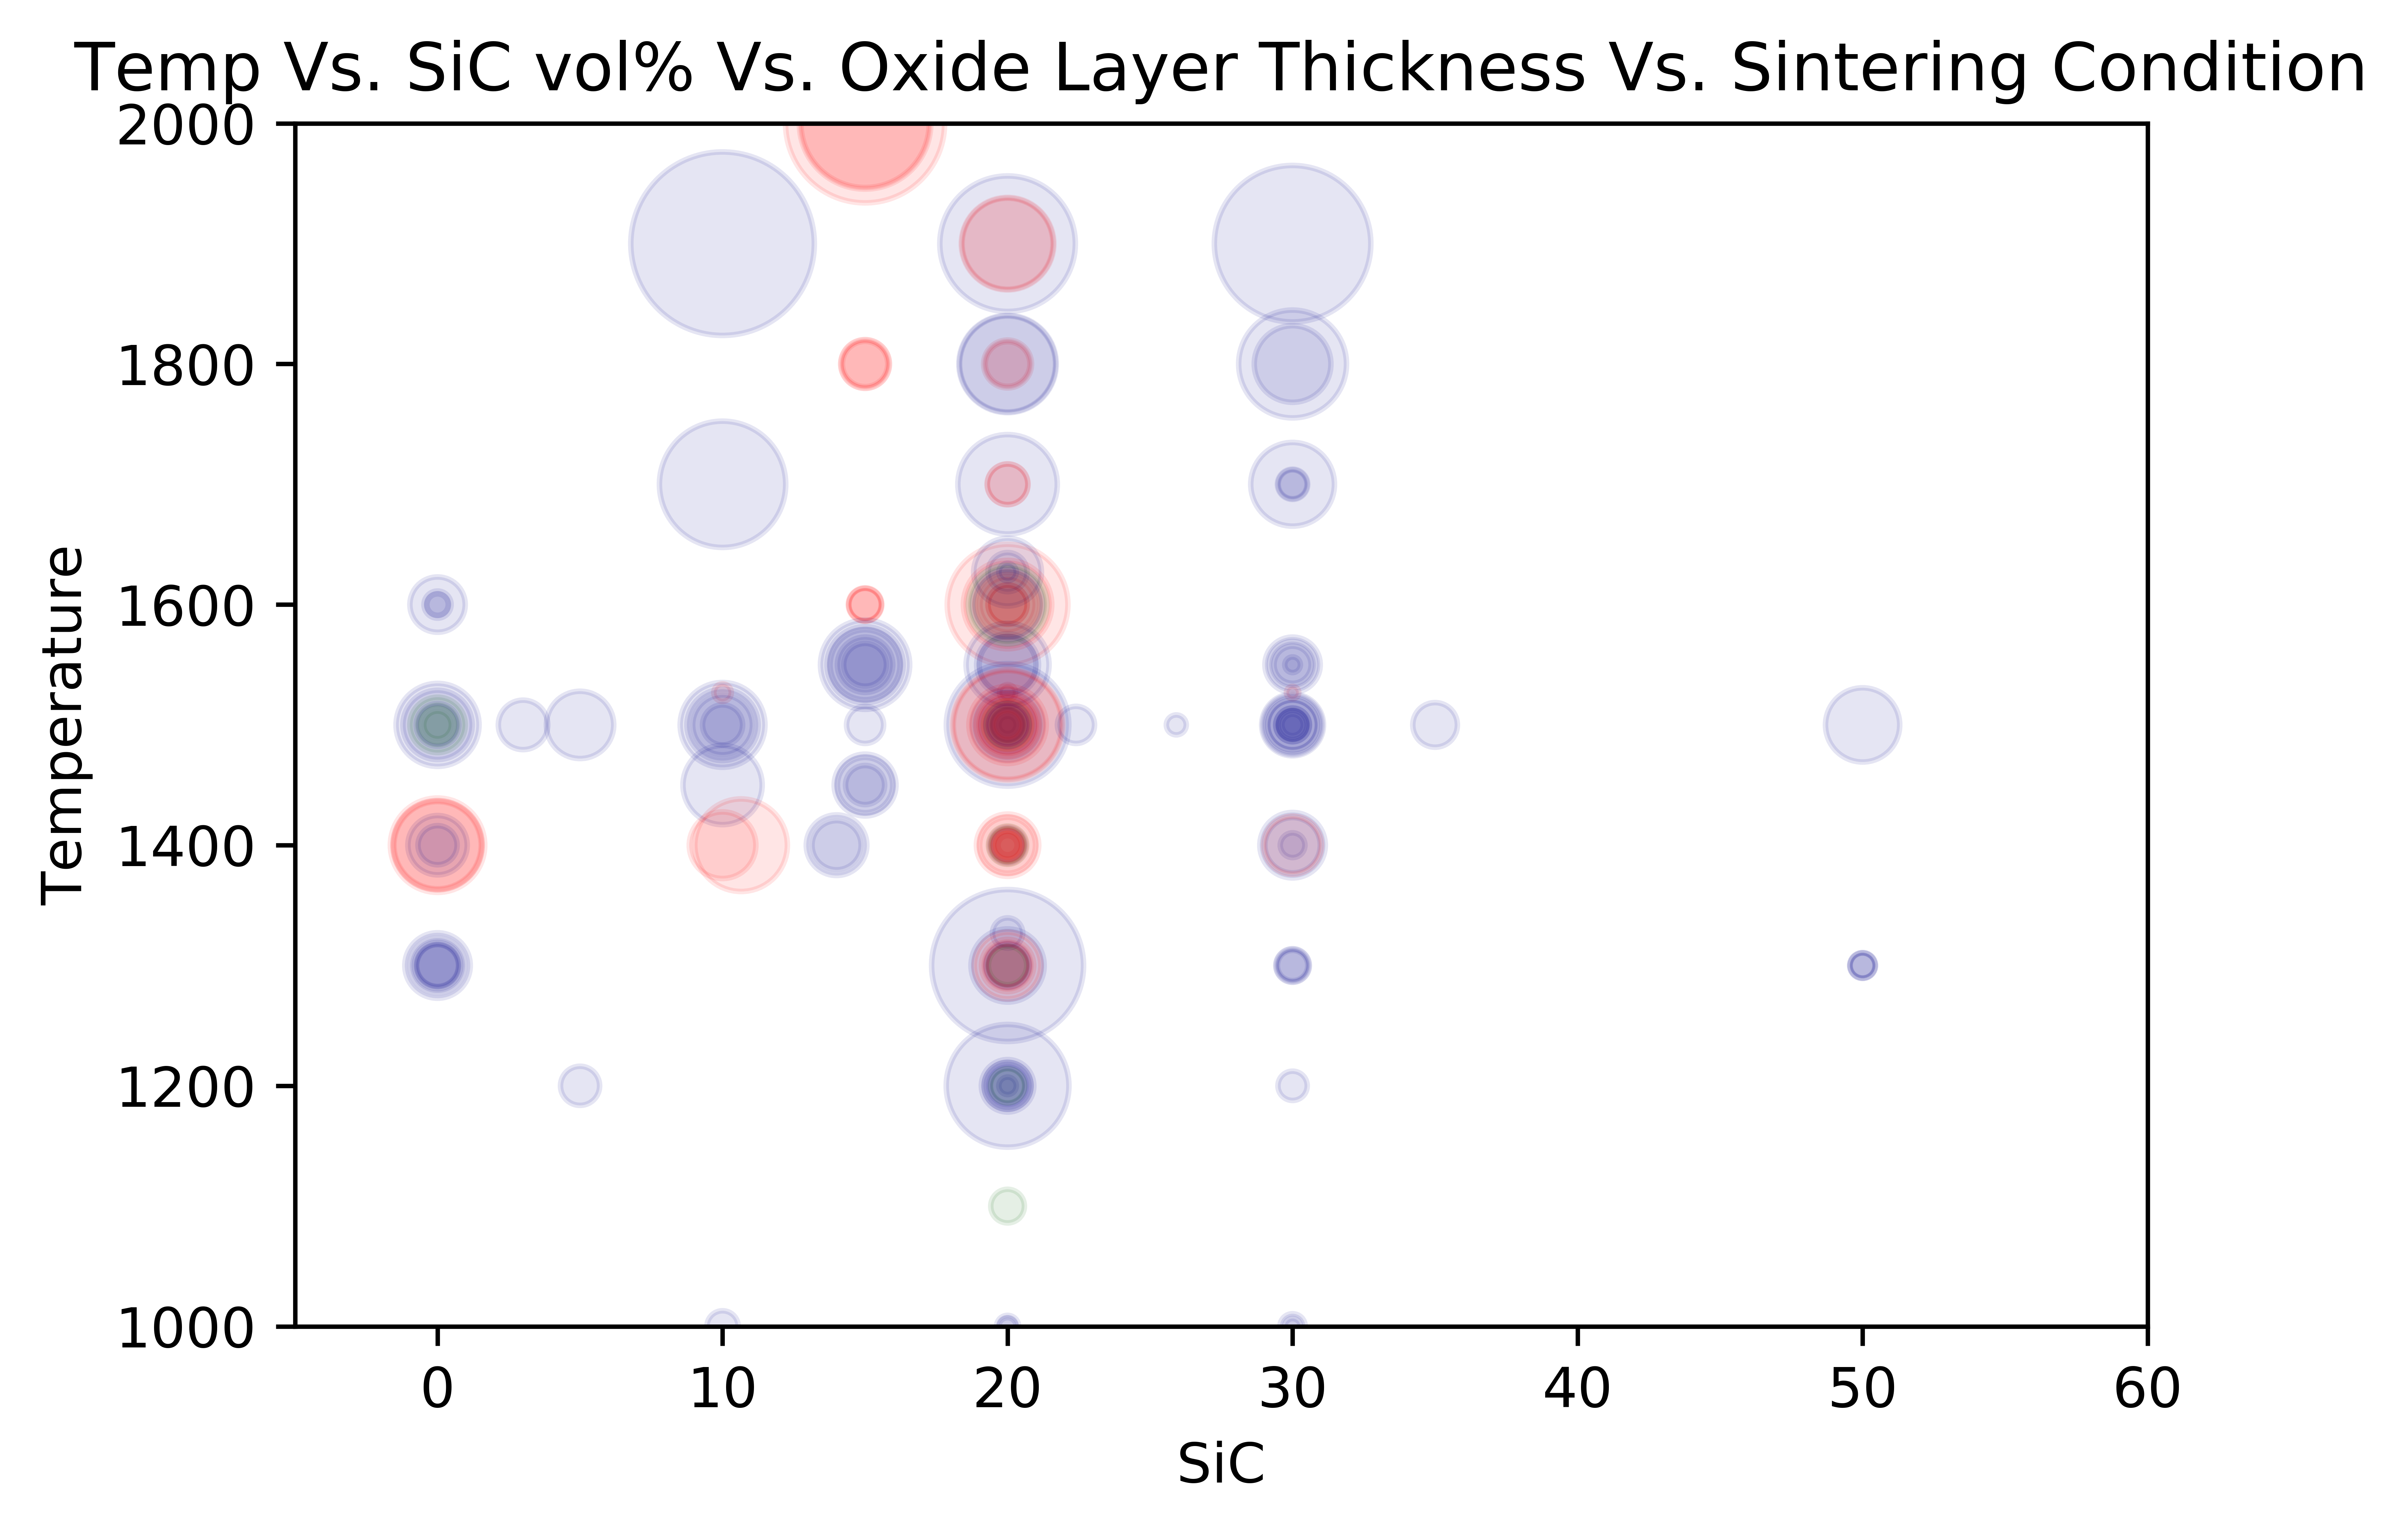

In [585]:
cdata = dataset[['SiC','Temperature (C)','Oxide Thickness (um)']]
colors = ['red','darkblue','darkgreen']
v,x = pd.factorize(dataset['Sintering Method'])

fig,ax = plt.subplots(dpi=1200)
plt.xlabel('SiC')
plt.ylabel('Temperature')
plt.title('Temp Vs. SiC vol% Vs. Oxide Layer Thickness Vs. Sintering Condition')

ax.scatter(x=dataset['SiC'],
                     y=dataset['Temperature (C)'],
                     s=dataset['Oxide Thickness (um)'].values*1,
                     c=v,
                     cmap=matplotlib.colors.ListedColormap(colors),
                     alpha = 0.1)

plt.xlim(-5,60)
plt.ylim(1000,2000)
plt.savefig('TvsSiCvsOT.pdf')
plt.show()

In [586]:
# OHE for sentireng methods

dataset = pd.concat([dataset.drop('Sintering Method', axis=1), pd.get_dummies(dataset['Sintering Method'])], axis=1)

from scipy.stats import pearsonr

corr_matrix = dataset.corr()
print(corr_matrix["Oxide Thickness (um)"].sort_values(ascending=False))
dataset

Oxide Thickness (um)        1.000000
Temperature (C)             0.448564
Time@Temp (min)             0.242382
Relative Density (%)        0.135920
ZrB2                        0.131214
Ta                          0.109598
Sintering Temperature ©     0.098221
Mean Grain Size (um)        0.095989
Spark Plasma Sintering      0.071428
WB                          0.068885
Sintering Time (min)        0.029413
Si3N4                       0.023014
B4C                         0.012965
WC                         -0.010567
Ta5Si3                     -0.011068
LaB6                       -0.024176
HfC                        -0.025814
Hot pressed                -0.029348
SiC                        -0.034546
Sintering Pressure (Mpa)   -0.045176
Mosi2                      -0.050704
ZrSi2                      -0.051083
TiSi2                      -0.054848
TaSi2                      -0.058442
La2O3                      -0.069855
Pressureless sintering     -0.071621
Mo                         -0.073526
H

ZrB2   HfB2  TaB2   SiC   Ta  TaC  Mo  B4C  Si3N4  Ta5Si3  ...  \
0     0.0  100.0   0.0   0.0  0.0    0   0  0.0    0.0       0  ...   
3     0.0   90.0   0.0  10.0  0.0    0   0  0.0    0.0       0  ...   
4     0.0   85.0   0.0  15.0  0.0    0   0  0.0    0.0       0  ...   
5     0.0   85.0   0.0  15.0  0.0    0   0  0.0    0.0       0  ...   
6     0.0   85.0   0.0  15.0  0.0    0   0  0.0    0.0       0  ...   
..    ...    ...   ...   ...  ...  ...  ..  ...    ...     ...  ...   
285  50.0    0.0   0.0  50.0  0.0    0   0  0.0    0.0       0  ...   
286  50.0    0.0   0.0  50.0  0.0    0   0  0.0    0.0       0  ...   
287  50.0    0.0   0.0  50.0  0.0    0   0  0.0    0.0       0  ...   
290  35.0    0.0   0.0  65.0  0.0    0   0  0.0    0.0       0  ...   
302  20.0    0.0   0.0  80.0  0.0    0   0  0.0    0.0       0  ...   

     Sintering Pressure (Mpa)  Sintering Time (min)  Mean Grain Size (um)  \
0                        50.0                   5.0                  12.0   
3                       100.0                  10.0                   4.7   
4                        32.0                   9.0                   2.6   
5                        32.0                   9.0                   2.6   
6                        32.0                   9.0                   2.6   
..                        ...                   ...                   ...   
285                      35.0                 120.0                   3.9   
286                      35.0                 120.0                   3.9   
287                      35.0                 120.0                   3.9   
290                       7.0                 600.0                   NaN   
302                      50.0                   5.0                   NaN   

     Relative Density (%)  Temperature (C)  Time@Temp (min)  \
0                    99.2          1400.00            60.00   
3                   100.0          1526.85            20.00   
4                    99.9          2000.00            30.00   
5                    99.9          1800.00            30.00   
6                    99.9          1600.00            30.00   
..                    ...              ...              ...   
285                  63.9          1300.00            16.67   
286                  63.9          1300.00            33.33   
287                  63.9          1300.00            58.33   
290                  92.0          1500.00          3000.00   
302                  92.0          1500.00          3000.00   

     Oxide Thickness (um)  Hot pressed  Pressureless sintering  \
0                   248.0            0                       0   
3                    10.0            0                       0   
4                   826.0            0                       0   
5                    78.0            0                       0   
6                    35.0            0                       0   
..                    ...          ...                     ...   
285                  20.0            1                       0   
286                  21.0            1                       0   
287                  22.0            1                       0   
290                 290.0            1                       0   
302                 380.0            0                       0   

     Spark Plasma Sintering  
0                         1  
3                         1  
4                         1  
5                         1  
6                         1  
..                      ...  
285                       0  
286                       0  
287                       0  
290                       0  
302                       1  

[164 rows x 36 columns]

In [587]:
# In[3]: Split Train and Test
train_dataset = dataset.sample(frac=0.7, random_state=2)
test_dataset = dataset.drop(train_dataset.index)
train_dataset

ZrB2  HfB2  TaB2   SiC   Ta  TaC  Mo  B4C  Si3N4  Ta5Si3  ...  \
67   100.0   0.0   0.0   0.0  0.0    0   0  0.0    0.0       0  ...   
28     0.0  80.0   0.0  20.0  0.0    0   0  0.0    0.0       0  ...   
78    90.0   0.0   0.0  10.0  0.0    0   0  0.0    0.0       0  ...   
274   95.0   0.0   0.0   0.0  0.0    0   0  5.0    0.0       0  ...   
18     0.0  80.0   0.0  20.0  0.0    0   0  0.0    0.0       0  ...   
..     ...   ...   ...   ...  ...  ...  ..  ...    ...     ...  ...   
167   80.0   0.0   0.0  20.0  0.0    0   0  0.0    0.0       0  ...   
199   60.0   0.0   0.0  20.0  0.0    0   0  0.0    0.0       0  ...   
219   70.0   0.0   0.0  30.0  0.0    0   0  0.0    0.0       0  ...   
107   85.0   0.0   0.0  15.0  0.0    0   0  0.0    0.0       0  ...   
149   80.0   0.0   0.0  20.0  0.0    0   0  0.0    0.0       0  ...   

     Sintering Pressure (Mpa)  Sintering Time (min)  Mean Grain Size (um)  \
67                       35.0                 180.0                  5.84   
28                       30.0                  30.0                   NaN   
78                       30.0                  60.0                  8.62   
274                     200.0                 120.0                 94.00   
18                       32.0                  17.0                  2.50   
..                        ...                   ...                   ...   
167                      25.0                  60.0                  4.02   
199                      70.0                 120.0                  5.00   
219                      30.0                  60.0                  7.50   
107                      30.0                  15.0                  5.50   
149                      30.0                  60.0                  6.00   

     Relative Density (%)  Temperature (C)  Time@Temp (min)  \
67                  67.60           1300.0            58.33   
28                  96.00           1300.0          1440.00   
78                 100.00           1900.0            60.00   
274                 95.94           2250.0           180.00   
18                  99.00           1900.0            60.00   
..                    ...              ...              ...   
167                 99.70           1500.0           300.00   
199                 97.70           1627.0           100.00   
219                100.00           1900.0            60.00   
107                   NaN           1550.0           120.00   
149                 98.10           1800.0            60.00   

     Oxide Thickness (um)  Hot pressed  Pressureless sintering  \
67                   98.0            1                       0   
28                   59.0            1                       0   
78                 1100.0            1                       0   
274                 287.0            0                       1   
18                  280.0            0                       0   
..                    ...          ...                     ...   
167                 114.0            1                       0   
199                  10.0            1                       0   
219                 800.0            1                       0   
107                  60.0            1                       0   
149                 300.0            1                       0   

     Spark Plasma Sintering  
67                        0  
28                        0  
78                        0  
274                       0  
18                        1  
..                      ...  
167                       0  
199                       0  
219                       0  
107                       0  
149                       0  

[115 rows x 36 columns]

In [546]:
# In[4]: Separate Targets from Dataset

train_stats = train_dataset.describe()
train_stats.pop('Oxide Thickness (um)')
train_stats = train_stats.transpose()
train_labels = train_dataset.pop('Oxide Thickness (um)')
test_labels = test_dataset.pop('Oxide Thickness (um)')

In [547]:
# In[5]: Normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

def norm(x):
    return (x - train_stats['mean']) / train_stats['std']


In [548]:
imptrain = SimpleImputer(missing_values=np.nan, strategy='mean')
imptest = SimpleImputer(missing_values=np.nan, strategy='mean')
Train_scaler = MinMaxScaler()
Test_scaler = MinMaxScaler()

normed_train_data = Train_scaler.fit_transform(train_dataset)
normed_test_data = Test_scaler.fit_transform(test_dataset)
imptrain.fit(normed_train_data)
imptest.fit(normed_test_data)
normed_train_data = imptrain.transform(normed_train_data)
normed_test_data = imptest.transform(normed_test_data)

In [549]:
# In[6]: Number of inputs
test_length = len(train_dataset.keys())

In [550]:
#simple models

clf = tree.DecisionTreeRegressor()
clf = clf.fit(normed_train_data, train_labels)

reg = linear_model.Lasso(alpha=0.3)
reg = reg.fit(normed_train_data, train_labels)

rfr = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=None,
                            bootstrap=True, oob_score=False, n_jobs=1, random_state=None)
rfr = rfr.fit(normed_train_data, train_labels)


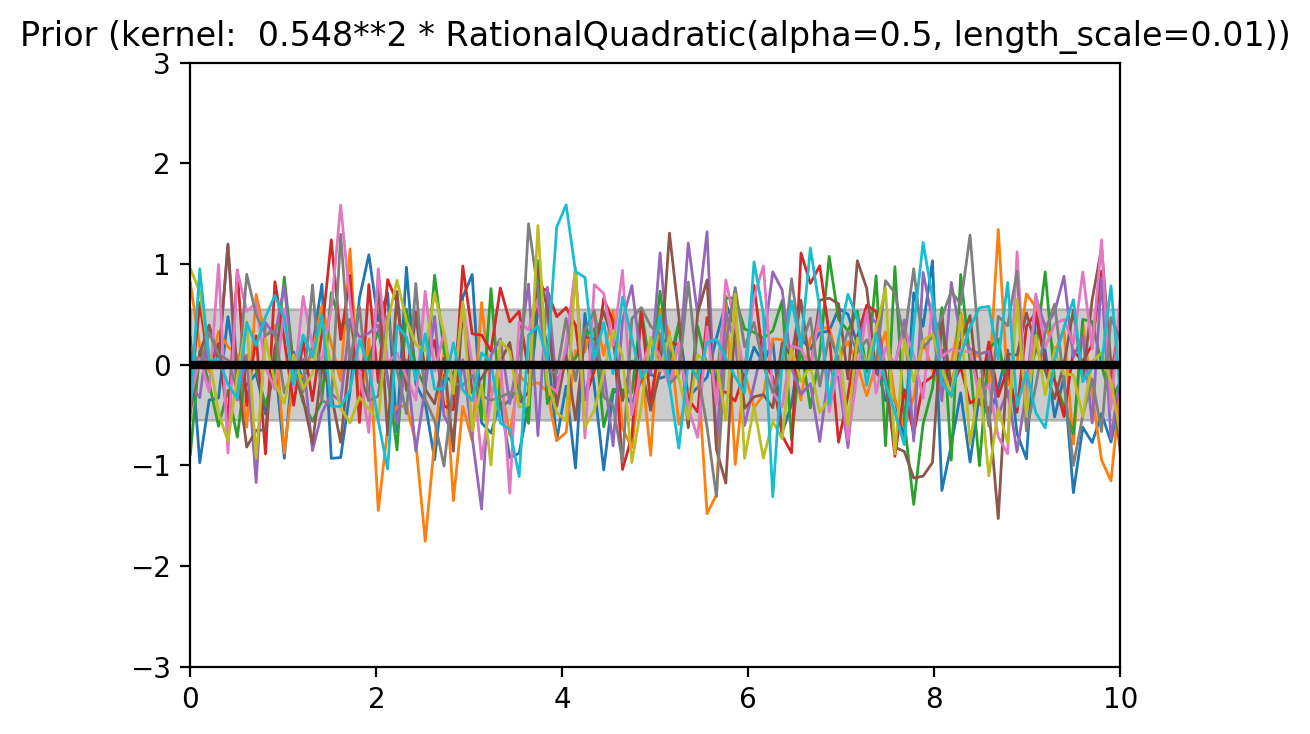

In [668]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, RationalQuadratic, WhiteKernel, ConstantKernel as C

# define a prior i.e. a distribution of functions
# what this really means: choose a kernel and kernel hyperparameters

kernel = 0.3 * RationalQuadratic(length_scale=1e-2, length_scale_bounds=(1e-1, 5.0), alpha=0.5)
#kernel = 0.3 * RationalQuadratic(length_scale=0.00001, alpha=0.0005)
gp = GaussianProcessRegressor(kernel=kernel,alpha=1)

# plot the prior
plt.figure(dpi=200)
X_ = np.linspace(0, 10, 100) 
y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
plt.fill_between(X_, y_mean - y_std, y_mean + y_std, alpha=0.2, color='k')
y_samples = gp.sample_y(X_[:, np.newaxis], 10) #these are just randomly chosen EXAMPLES to plot
plt.plot(X_, y_samples, lw=1)
plt.xlim(0, 10)
plt.ylim(-3, 3)
plt.title("Prior (kernel:  %s)" % kernel, fontsize=12)
plt.savefig('prior_1')

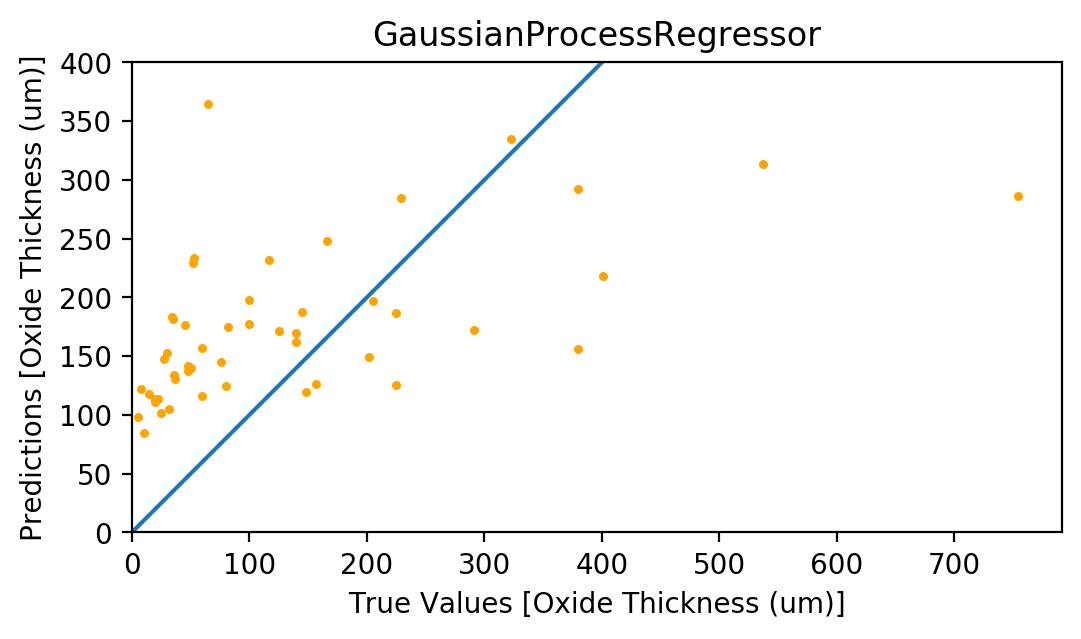

16808.76575940275

In [669]:
gp.fit(normed_train_data, train_labels)
y_samples = gp.predict(normed_test_data)
y_samples.shape
plt.figure(dpi=200)
plt.scatter(test_labels, y_samples, c='orange', s=20, marker='.')
plt.title("GaussianProcessRegressor")
plt.xlabel('True Values [Oxide Thickness (um)]')
plt.ylabel('Predictions [Oxide Thickness (um)]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,400])
_ = plt.plot([-1000, 1000], [-1000, 1000])
plt.savefig('GuassProceReg.jpeg')
plt.show()
mean_squared_error(test_labels,y_samples)

In [629]:
# deep leanring model

def build_model():
    model = keras.Sequential([
        layers.Dense(32, kernel_initializer='normal', activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
        layers.Dense(64, kernel_regularizer=regularizers.l2(0.0001), activation='relu'),
        layers.Dense(64, kernel_regularizer=regularizers.l2(0.0001), activation='relu'),
        layers.Dense(1, kernel_initializer='normal', activation='linear')  # Output Layer
    ])

    optimizer = keras.optimizers.Adam(learning_rate=0.001)

    model.compile(loss='mean_squared_error',
                  optimizer=optimizer,
                  metrics=['mean_absolute_error', 'mean_squared_error'])
    return model

model = build_model()
model.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_178 (Dense)            (None, 32)                1184      
_________________________________________________________________
dense_179 (Dense)            (None, 64)                2112      
_________________________________________________________________
dense_180 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_181 (Dense)            (None, 1)                 65        
Total params: 7,521
Trainable params: 7,521
Non-trainable params: 0
_________________________________________________________________


The average loss for epoch 0 is 52861.32 and mean absolute error is  145.59.
The average loss for epoch 1 is 52853.96 and mean absolute error is  145.57.
The average loss for epoch 2 is 52846.55 and mean absolute error is  145.54.
The average loss for epoch 3 is 52836.46 and mean absolute error is  145.51.
The average loss for epoch 4 is 52825.21 and mean absolute error is  145.47.
The average loss for epoch 5 is 52808.98 and mean absolute error is  145.42.
The average loss for epoch 6 is 52787.74 and mean absolute error is  145.35.
The average loss for epoch 7 is 52762.82 and mean absolute error is  145.26.
The average loss for epoch 8 is 52724.90 and mean absolute error is  145.14.
The average loss for epoch 9 is 52679.30 and mean absolute error is  144.98.
The average loss for epoch 10 is 52611.32 and mean absolute error is  144.76.
The average loss for epoch 11 is 52528.21 and mean absolute error is  144.48.
The average loss for epoch 12 is 52411.53 and mean absolute error is  144.

The average loss for epoch 102 is 27289.46 and mean absolute error is  107.82.
The average loss for epoch 103 is 27253.94 and mean absolute error is  107.90.
The average loss for epoch 104 is 27201.17 and mean absolute error is  107.71.
The average loss for epoch 105 is 27148.62 and mean absolute error is  107.31.
The average loss for epoch 106 is 27113.66 and mean absolute error is  107.01.
The average loss for epoch 107 is 27069.03 and mean absolute error is  107.03.
The average loss for epoch 108 is 27004.14 and mean absolute error is  106.74.
The average loss for epoch 109 is 26966.92 and mean absolute error is  106.24.
The average loss for epoch 110 is 26951.43 and mean absolute error is  106.29.
The average loss for epoch 111 is 26872.17 and mean absolute error is  106.06.
The average loss for epoch 112 is 26817.02 and mean absolute error is  105.74.
The average loss for epoch 113 is 26800.36 and mean absolute error is  105.96.
The average loss for epoch 114 is 26722.39 and mean 

The average loss for epoch 213 is 20173.94 and mean absolute error is   85.32.
The average loss for epoch 214 is 20071.46 and mean absolute error is   85.31.
The average loss for epoch 215 is 19992.21 and mean absolute error is   84.96.
The average loss for epoch 216 is 19885.52 and mean absolute error is   84.81.
The average loss for epoch 217 is 19796.33 and mean absolute error is   84.68.
The average loss for epoch 218 is 19711.05 and mean absolute error is   84.43.
The average loss for epoch 219 is 19668.96 and mean absolute error is   84.34.
The average loss for epoch 220 is 19577.20 and mean absolute error is   83.97.
The average loss for epoch 221 is 19452.27 and mean absolute error is   83.29.
The average loss for epoch 222 is 19364.34 and mean absolute error is   83.14.
The average loss for epoch 223 is 19319.74 and mean absolute error is   82.64.
The average loss for epoch 224 is 19217.74 and mean absolute error is   82.12.
The average loss for epoch 225 is 19145.19 and mean 

The average loss for epoch 319 is 10481.17 and mean absolute error is   62.37.
The average loss for epoch 320 is 10367.07 and mean absolute error is   62.33.
The average loss for epoch 321 is 10336.98 and mean absolute error is   62.91.
The average loss for epoch 322 is 10213.39 and mean absolute error is   62.70.
The average loss for epoch 323 is 10079.19 and mean absolute error is   62.10.
The average loss for epoch 324 is 9990.01 and mean absolute error is   61.44.
The average loss for epoch 325 is 9888.60 and mean absolute error is   61.05.
The average loss for epoch 326 is 9814.98 and mean absolute error is   60.95.
The average loss for epoch 327 is 9725.84 and mean absolute error is   60.88.
The average loss for epoch 328 is 9607.58 and mean absolute error is   60.47.
The average loss for epoch 329 is 9550.74 and mean absolute error is   60.37.
The average loss for epoch 330 is 9418.34 and mean absolute error is   60.10.
The average loss for epoch 331 is 9347.86 and mean absolute

The average loss for epoch 425 is 4737.52 and mean absolute error is   45.94.
The average loss for epoch 426 is 4693.56 and mean absolute error is   45.75.
The average loss for epoch 427 is 4667.07 and mean absolute error is   45.45.
The average loss for epoch 428 is 4668.82 and mean absolute error is   45.41.
The average loss for epoch 429 is 4639.23 and mean absolute error is   45.31.
The average loss for epoch 430 is 4726.08 and mean absolute error is   45.21.
The average loss for epoch 431 is 4575.22 and mean absolute error is   44.39.
The average loss for epoch 432 is 4529.54 and mean absolute error is   44.57.
The average loss for epoch 433 is 4506.62 and mean absolute error is   44.76.
The average loss for epoch 434 is 4514.11 and mean absolute error is   45.03.
The average loss for epoch 435 is 4469.03 and mean absolute error is   44.44.
The average loss for epoch 436 is 4439.80 and mean absolute error is   44.15.
The average loss for epoch 437 is 4413.33 and mean absolute erro

The average loss for epoch 536 is 2838.21 and mean absolute error is   34.34.
The average loss for epoch 537 is 2810.64 and mean absolute error is   34.08.
The average loss for epoch 538 is 2880.44 and mean absolute error is   34.46.
The average loss for epoch 539 is 2805.50 and mean absolute error is   34.07.
The average loss for epoch 540 is 2788.86 and mean absolute error is   34.37.
The average loss for epoch 541 is 2796.22 and mean absolute error is   34.50.
The average loss for epoch 542 is 2775.32 and mean absolute error is   34.13.
The average loss for epoch 543 is 2767.97 and mean absolute error is   33.85.
The average loss for epoch 544 is 2792.43 and mean absolute error is   34.00.
The average loss for epoch 545 is 2766.37 and mean absolute error is   33.97.
The average loss for epoch 546 is 2750.50 and mean absolute error is   33.71.
The average loss for epoch 547 is 2748.96 and mean absolute error is   33.64.
The average loss for epoch 548 is 2726.09 and mean absolute erro

The average loss for epoch 642 is 2339.39 and mean absolute error is   31.16.
The average loss for epoch 643 is 2285.57 and mean absolute error is   30.96.
The average loss for epoch 644 is 2245.07 and mean absolute error is   30.12.
The average loss for epoch 645 is 2302.26 and mean absolute error is   30.37.
The average loss for epoch 646 is 2334.22 and mean absolute error is   30.82.
The average loss for epoch 647 is 2292.08 and mean absolute error is   30.60.
The average loss for epoch 648 is 2249.13 and mean absolute error is   30.26.
The average loss for epoch 649 is 2229.82 and mean absolute error is   29.77.
The average loss for epoch 650 is 2264.71 and mean absolute error is   29.80.
The average loss for epoch 651 is 2230.80 and mean absolute error is   29.57.
The average loss for epoch 652 is 2234.82 and mean absolute error is   29.86.
The average loss for epoch 653 is 2269.09 and mean absolute error is   29.97.
The average loss for epoch 654 is 2215.21 and mean absolute erro

The average loss for epoch 751 is 1889.97 and mean absolute error is   27.13.
The average loss for epoch 752 is 1889.66 and mean absolute error is   27.04.
The average loss for epoch 753 is 1882.97 and mean absolute error is   26.90.
The average loss for epoch 754 is 1896.89 and mean absolute error is   26.97.
The average loss for epoch 755 is 1888.92 and mean absolute error is   26.93.
The average loss for epoch 756 is 1900.29 and mean absolute error is   27.07.
The average loss for epoch 757 is 1875.45 and mean absolute error is   26.91.
The average loss for epoch 758 is 1865.46 and mean absolute error is   26.91.
The average loss for epoch 759 is 1858.71 and mean absolute error is   26.73.
The average loss for epoch 760 is 1853.30 and mean absolute error is   26.58.
The average loss for epoch 761 is 1866.68 and mean absolute error is   26.85.
The average loss for epoch 762 is 1881.84 and mean absolute error is   26.92.
The average loss for epoch 763 is 1869.83 and mean absolute erro

The average loss for epoch 859 is 1511.12 and mean absolute error is   24.32.
The average loss for epoch 860 is 1522.62 and mean absolute error is   24.37.
The average loss for epoch 861 is 1502.94 and mean absolute error is   24.17.
The average loss for epoch 862 is 1501.17 and mean absolute error is   24.20.
The average loss for epoch 863 is 1500.34 and mean absolute error is   24.26.
The average loss for epoch 864 is 1503.19 and mean absolute error is   24.26.
The average loss for epoch 865 is 1497.42 and mean absolute error is   24.22.
The average loss for epoch 866 is 1502.44 and mean absolute error is   24.42.
The average loss for epoch 867 is 1487.91 and mean absolute error is   24.18.
The average loss for epoch 868 is 1496.98 and mean absolute error is   24.29.
The average loss for epoch 869 is 1495.35 and mean absolute error is   24.24.
The average loss for epoch 870 is 1490.14 and mean absolute error is   24.21.
The average loss for epoch 871 is 1490.64 and mean absolute erro

The average loss for epoch 969 is 1225.20 and mean absolute error is   21.95.
The average loss for epoch 970 is 1209.14 and mean absolute error is   22.02.
The average loss for epoch 971 is 1194.08 and mean absolute error is   21.74.
The average loss for epoch 972 is 1202.11 and mean absolute error is   21.83.
The average loss for epoch 973 is 1196.51 and mean absolute error is   21.75.
The average loss for epoch 974 is 1199.56 and mean absolute error is   21.73.
The average loss for epoch 975 is 1196.11 and mean absolute error is   21.83.
The average loss for epoch 976 is 1187.49 and mean absolute error is   21.80.
The average loss for epoch 977 is 1186.90 and mean absolute error is   21.72.
The average loss for epoch 978 is 1181.89 and mean absolute error is   21.66.
The average loss for epoch 979 is 1177.91 and mean absolute error is   21.63.
The average loss for epoch 980 is 1192.98 and mean absolute error is   21.92.
The average loss for epoch 981 is 1211.52 and mean absolute erro

The average loss for epoch 1079 is  978.28 and mean absolute error is   19.07.
The average loss for epoch 1080 is  995.01 and mean absolute error is   19.29.
The average loss for epoch 1081 is 1015.20 and mean absolute error is   19.68.
The average loss for epoch 1082 is  994.39 and mean absolute error is   19.68.
The average loss for epoch 1083 is  981.21 and mean absolute error is   19.36.
The average loss for epoch 1084 is  984.54 and mean absolute error is   19.69.
The average loss for epoch 1085 is  968.42 and mean absolute error is   19.27.
The average loss for epoch 1086 is  986.21 and mean absolute error is   19.74.
The average loss for epoch 1087 is  979.39 and mean absolute error is   19.44.
The average loss for epoch 1088 is  964.87 and mean absolute error is   19.33.
The average loss for epoch 1089 is  973.18 and mean absolute error is   19.53.
The average loss for epoch 1090 is  967.10 and mean absolute error is   19.17.
The average loss for epoch 1091 is  961.72 and mean 

The average loss for epoch 1187 is  838.40 and mean absolute error is   17.05.
The average loss for epoch 1188 is  835.24 and mean absolute error is   17.12.
The average loss for epoch 1189 is  837.64 and mean absolute error is   16.95.
The average loss for epoch 1190 is  838.87 and mean absolute error is   17.37.
The average loss for epoch 1191 is  830.54 and mean absolute error is   16.94.
The average loss for epoch 1192 is  849.40 and mean absolute error is   17.45.
The average loss for epoch 1193 is  830.69 and mean absolute error is   17.25.
The average loss for epoch 1194 is  824.67 and mean absolute error is   17.13.
The average loss for epoch 1195 is  839.36 and mean absolute error is   17.54.
The average loss for epoch 1196 is  825.03 and mean absolute error is   16.68.
The average loss for epoch 1197 is  837.10 and mean absolute error is   17.35.
The average loss for epoch 1198 is  831.13 and mean absolute error is   16.74.
The average loss for epoch 1199 is  823.21 and mean 

The average loss for epoch 1294 is  726.13 and mean absolute error is   15.15.
The average loss for epoch 1295 is  731.98 and mean absolute error is   15.14.
The average loss for epoch 1296 is  735.42 and mean absolute error is   15.33.
The average loss for epoch 1297 is  727.44 and mean absolute error is   15.23.
The average loss for epoch 1298 is  723.62 and mean absolute error is   15.27.
The average loss for epoch 1299 is  722.14 and mean absolute error is   15.09.
The average loss for epoch 1300 is  720.87 and mean absolute error is   15.29.
The average loss for epoch 1301 is  723.02 and mean absolute error is   15.08.
The average loss for epoch 1302 is  728.12 and mean absolute error is   14.97.
The average loss for epoch 1303 is  725.56 and mean absolute error is   14.98.
The average loss for epoch 1304 is  726.29 and mean absolute error is   15.11.
The average loss for epoch 1305 is  718.70 and mean absolute error is   14.88.
The average loss for epoch 1306 is  735.63 and mean 

The average loss for epoch 1401 is  632.66 and mean absolute error is   13.64.
The average loss for epoch 1402 is  635.45 and mean absolute error is   13.64.
The average loss for epoch 1403 is  632.69 and mean absolute error is   13.65.
The average loss for epoch 1404 is  644.94 and mean absolute error is   13.88.
The average loss for epoch 1405 is  630.35 and mean absolute error is   13.45.
The average loss for epoch 1406 is  631.15 and mean absolute error is   13.67.
The average loss for epoch 1407 is  629.91 and mean absolute error is   13.49.
The average loss for epoch 1408 is  634.54 and mean absolute error is   13.94.
The average loss for epoch 1409 is  635.98 and mean absolute error is   13.67.
The average loss for epoch 1410 is  622.30 and mean absolute error is   13.27.
The average loss for epoch 1411 is  629.63 and mean absolute error is   13.43.
The average loss for epoch 1412 is  620.22 and mean absolute error is   13.24.
The average loss for epoch 1413 is  626.14 and mean 

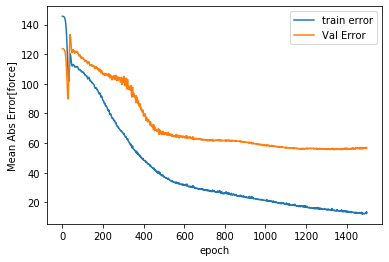

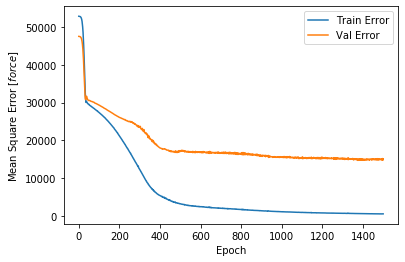

The average loss for epoch 0 is  576.59 and mean absolute error is   12.81.
The average loss for epoch 1 is  569.07 and mean absolute error is   13.28.
The average loss for epoch 2 is  565.87 and mean absolute error is   12.88.
The average loss for epoch 3 is  573.67 and mean absolute error is   13.01.
The average loss for epoch 4 is  562.02 and mean absolute error is   12.74.
The average loss for epoch 5 is  558.42 and mean absolute error is   12.33.
The average loss for epoch 6 is  560.03 and mean absolute error is   12.69.
The average loss for epoch 7 is  580.36 and mean absolute error is   12.47.
The average loss for epoch 8 is  568.14 and mean absolute error is   12.75.
The average loss for epoch 9 is  560.17 and mean absolute error is   12.65.
The average loss for epoch 10 is  565.91 and mean absolute error is   12.65.
The average loss for epoch 11 is  561.56 and mean absolute error is   12.61.
The average loss for epoch 12 is  555.08 and mean absolute error is   12.41.
The avera

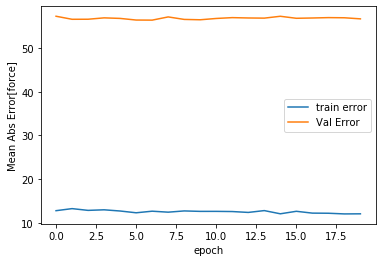

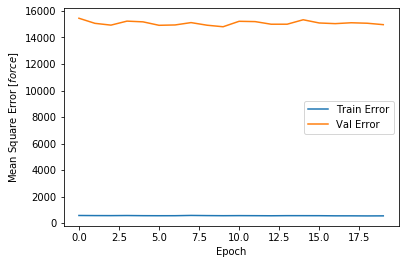

Validation mean abs error: 365.60 
Validation Mean Square Error: 537603.56 


In [554]:
logger = keras.callbacks.TensorBoard(log_dir='logs', histogram_freq=0,
                                     write_graph=True, write_images=True)
# In[18]:
class LossAndErrorPrintingCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(
            "The average loss for epoch {} is {:7.2f} "
            "and mean absolute error is {:7.2f}.".format(
                epoch, logs["loss"], logs["mean_absolute_error"]
            )
        )

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure()
    plt.xlabel('epoch')
    plt.ylabel('Mean Abs Error[force]')
    plt.plot(hist['epoch'], hist['mean_absolute_error'], label='train error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'], label='Val Error')
    # plt.ylim([0,5])
    plt.legend()
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$force$]')
    plt.plot(hist['epoch'], hist['mean_squared_error'],
             label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'],
             label='Val Error')
    # plt.ylim([0,20])
    plt.legend()
    plt.show()
    
EPOCH = 1500

history = model.fit(normed_train_data, train_labels,
                    epochs=EPOCH, validation_split=0.2, verbose=0,
                    callbacks=[LossAndErrorPrintingCallback(), logger])

# In[19]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()
# In[20]:
plot_history(history)
# In[21]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(normed_train_data, train_labels, epochs=EPOCH,
                    validation_split=0.2, verbose=0, callbacks=[early_stop, LossAndErrorPrintingCallback(), logger])
plot_history(history)
# In[22]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)
print("Validation mean abs error: {:5.2f} ".format(mae))
print("Validation Mean Square Error: {:5.2f} ".format(mse))

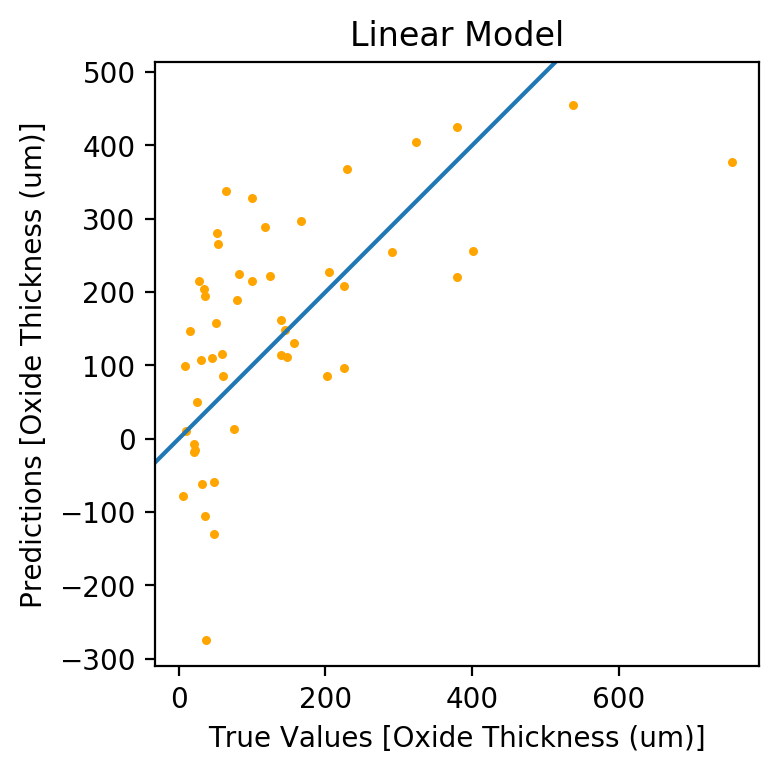

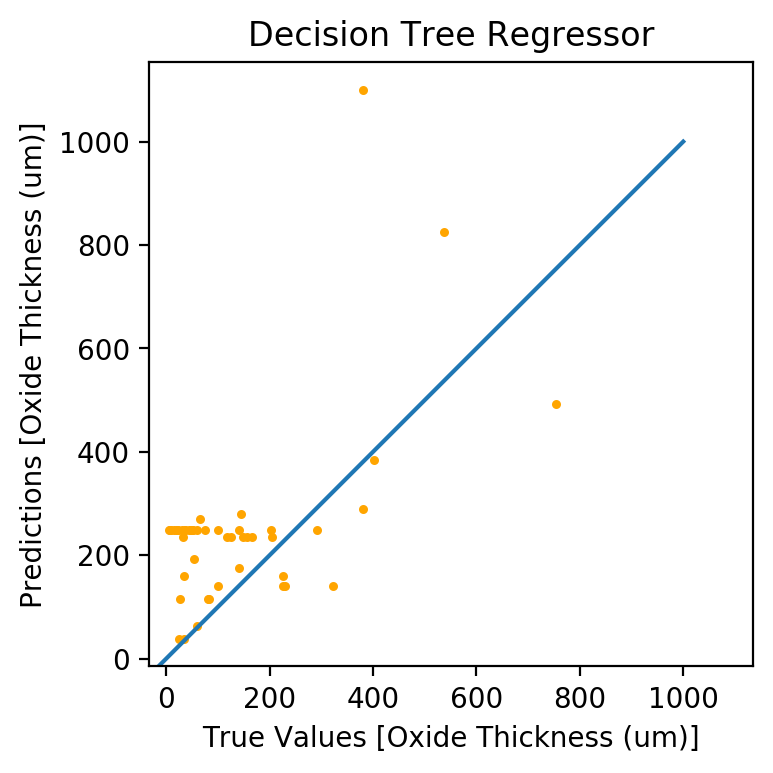

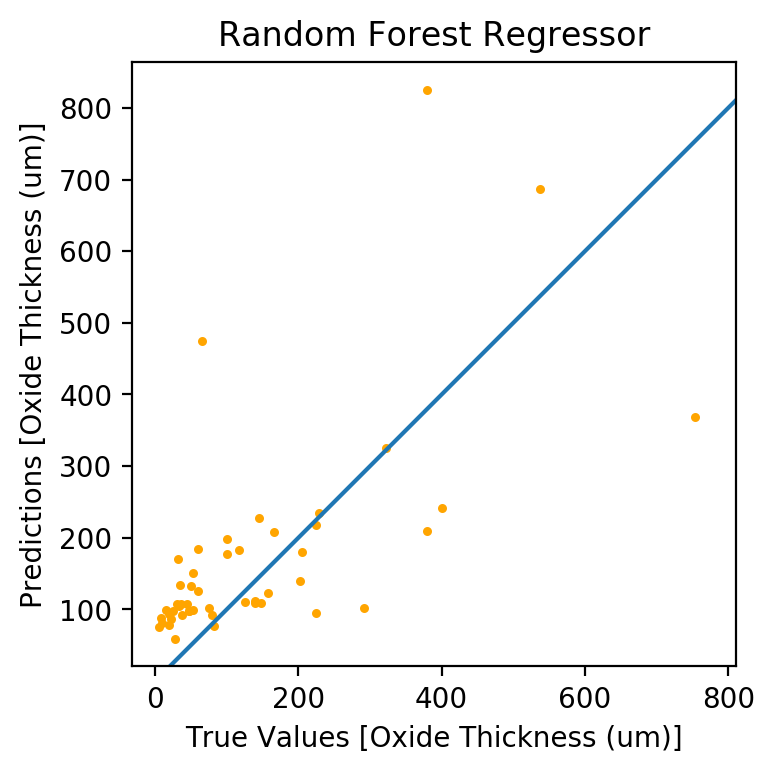

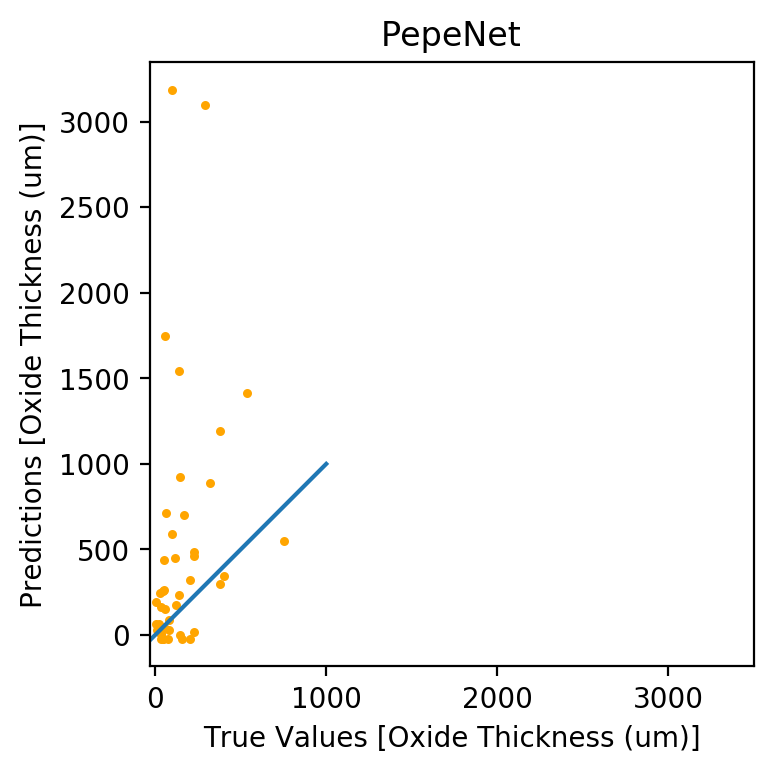

In [555]:
# In[23]: Predictiong in Testing dataset

tree_predict = clf.predict(normed_test_data).flatten()
reg_predict = reg.predict(normed_test_data).flatten()
rfr_predict = rfr.predict(normed_test_data).flatten()
test_predictions = model.predict(normed_test_data).flatten()


plt.figure(dpi=200)
plt.scatter(test_labels, reg_predict, c='orange',s=20, marker='.')
plt.title("Linear Model")
plt.xlabel('True Values [Oxide Thickness (um)]')
plt.ylabel('Predictions [Oxide Thickness (um)]')
plt.axis('equal')
plt.axis('square')
# plt.xlim([0,plt.xlim()[1]])
# plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-1000, 1000], [-1000, 1000])
plt.savefig('Linearmodel')
plt.show()

plt.figure(dpi=200)
plt.scatter(test_labels, tree_predict, c='orange',s=20, marker='.')
plt.title("Decision Tree Regressor")
plt.xlabel('True Values [Oxide Thickness (um)]')
plt.ylabel('Predictions [Oxide Thickness (um)]')
plt.axis('equal')
plt.axis('square')
# plt.xlim([0,plt.xlim()[1]])
# plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-1000, 1000], [-1000, 1000])
plt.savefig('DisTreeReg')
plt.show()

plt.figure(dpi=200)
plt.scatter(test_labels, rfr_predict, c='orange',s=20, marker='.')
plt.title("Random Forest Regressor")
plt.xlabel('True Values [Oxide Thickness (um)]')
plt.ylabel('Predictions [Oxide Thickness (um)]')
plt.axis('equal')
plt.axis('square')
# plt.xlim([0,plt.xlim()[1]])
# plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-1000, 1000], [-1000, 1000])
plt.savefig('rfrpred')
plt.show()

plt.figure(dpi=200)
plt.scatter(test_labels, test_predictions, c='orange',s=20, marker='.')
plt.title("PepeNet")
plt.xlabel('True Values [Oxide Thickness (um)]')
plt.ylabel('Predictions [Oxide Thickness (um)]')
plt.axis('equal')
plt.axis('square')
# plt.xlim([0,plt.xlim()[1]])
# plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-1000, 1000], [-1000, 1000])
plt.savefig('PepeNEt')
plt.show()

<Figure size 432x288 with 0 Axes>

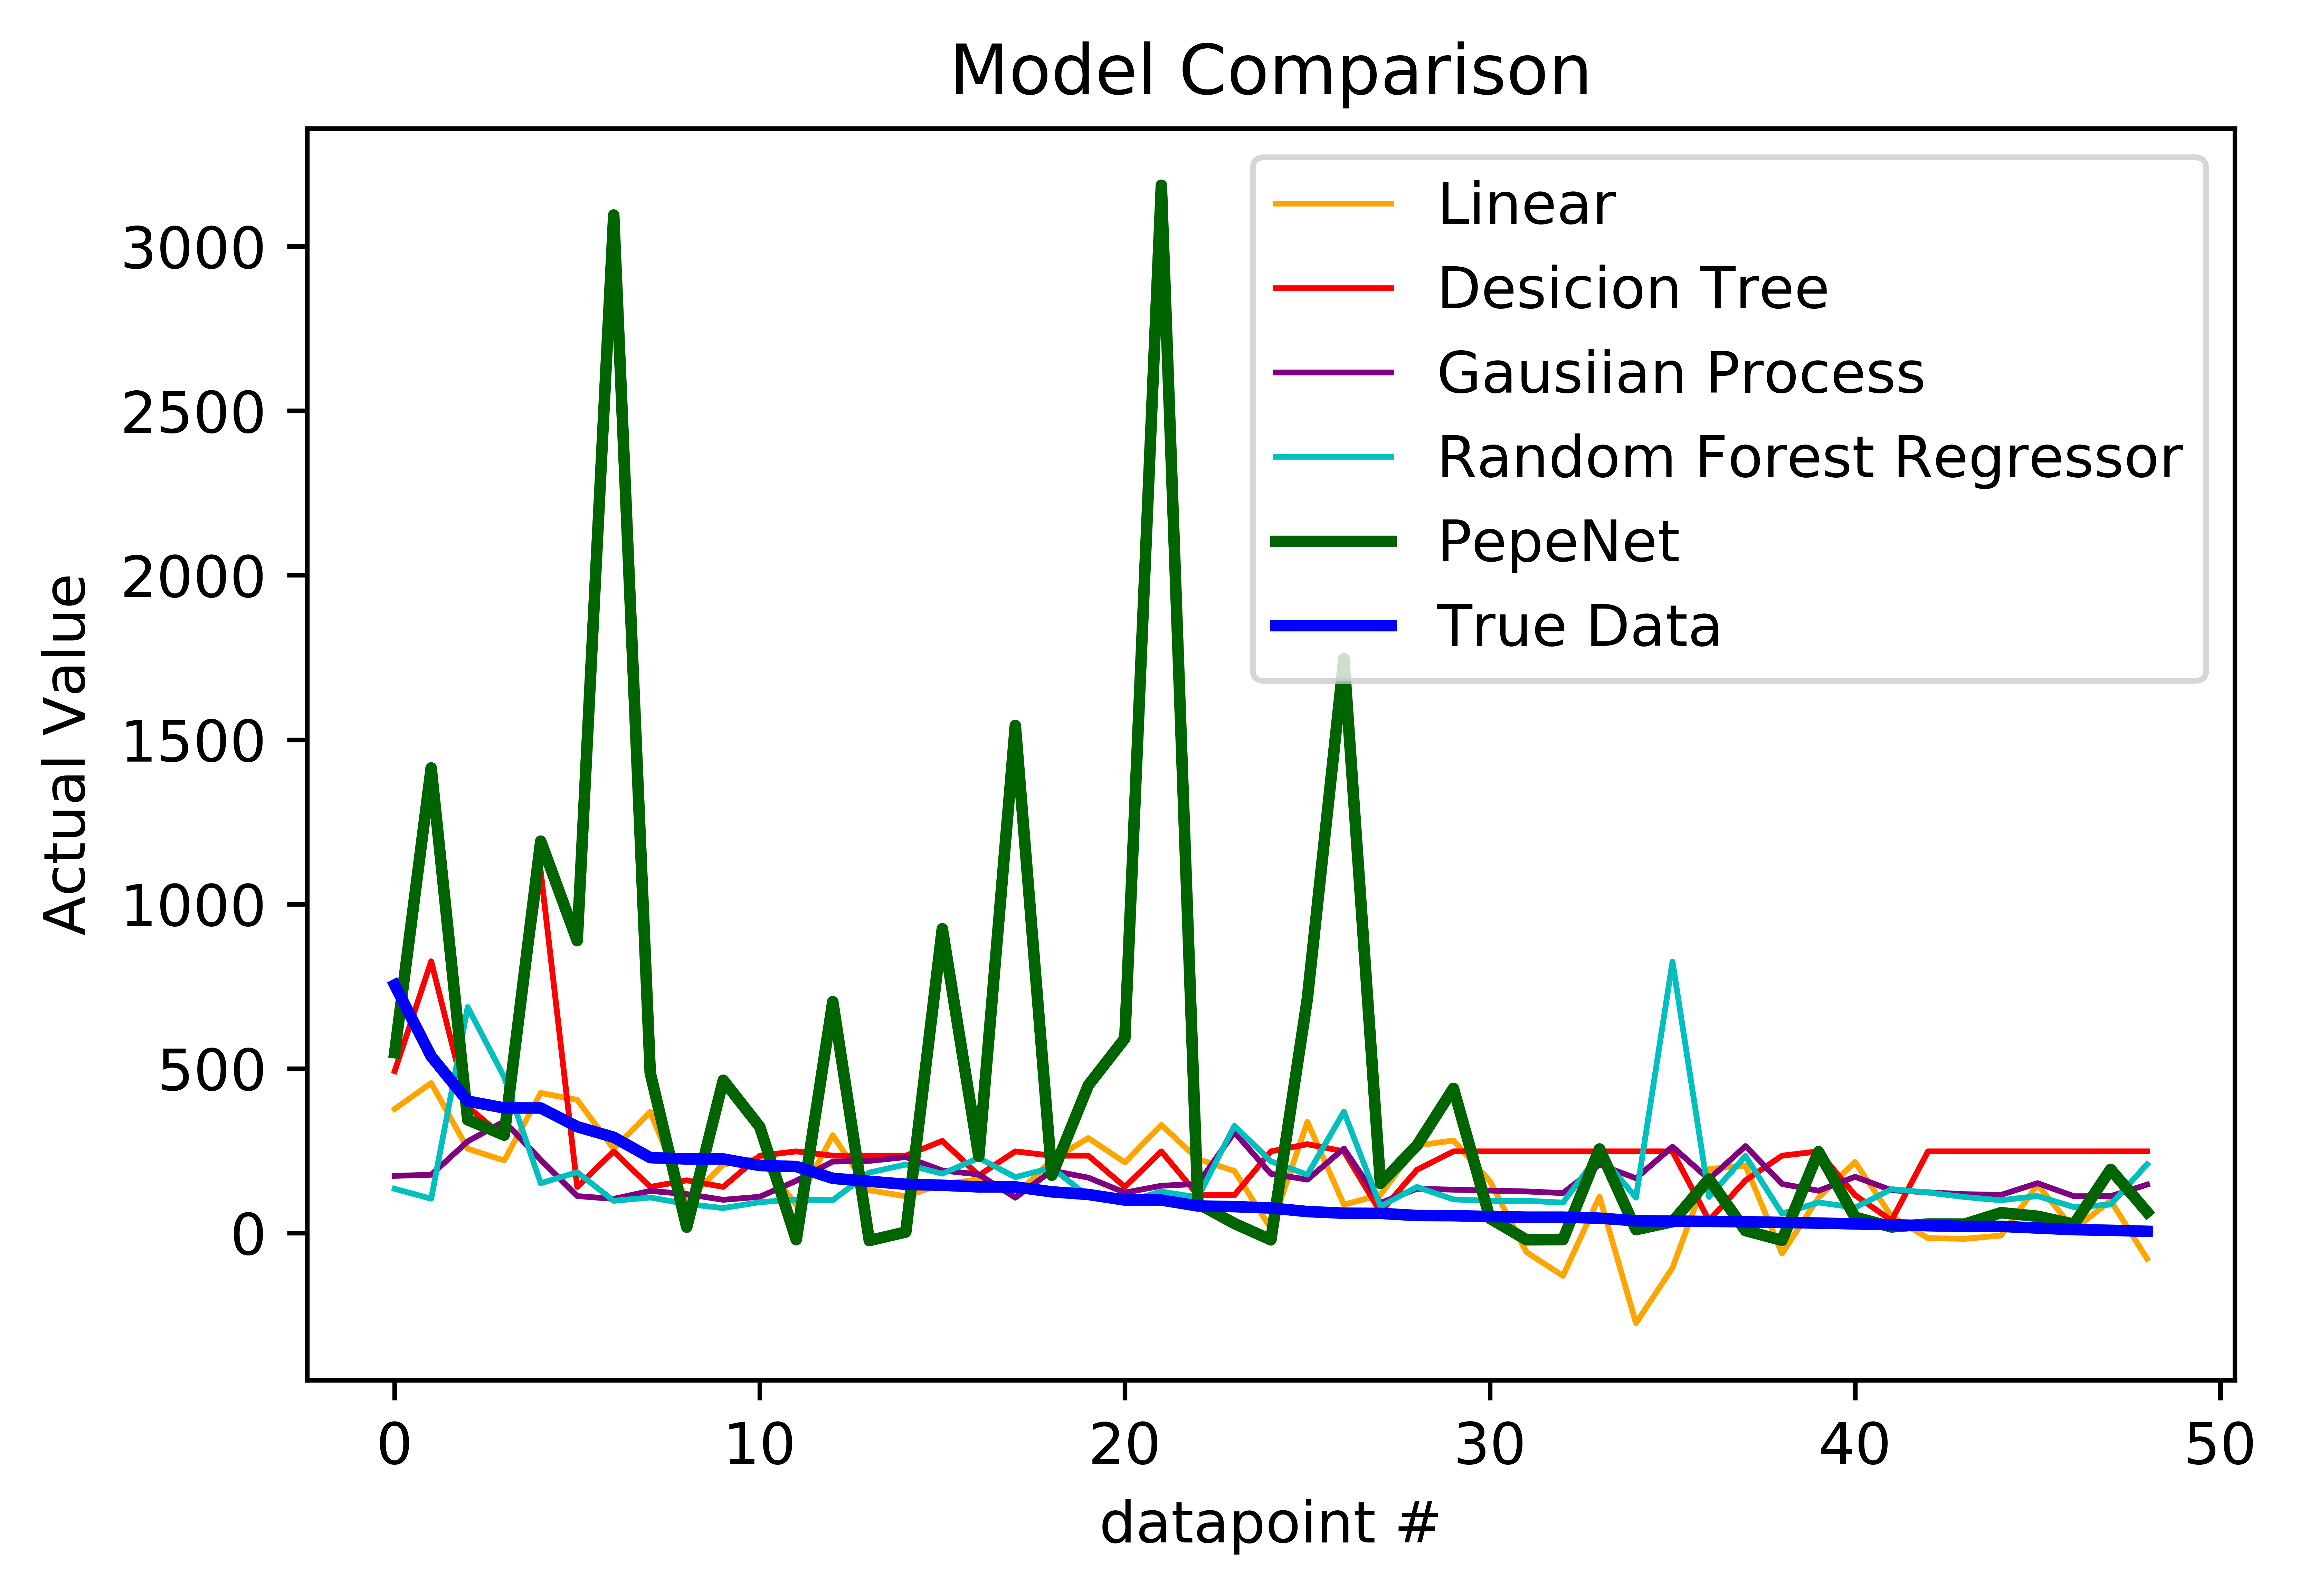

In [558]:
d = {'True values': test_labels, 'Pred1': reg_predict,'Pred2': tree_predict,'Pred3': test_predictions}
pdp = pd.DataFrame(data=d)
pdp = pdp.sort_values(by=['True values'], ascending=False)

fig = plt.figure()
plt.figure(dpi=1200)
plt.plot(range(len(test_predictions)),pdp['Pred1'], c='orange',label='Linear',linewidth=1)
plt.plot(range(len(test_predictions)),pdp['Pred2'], c='red',label='Desicion Tree',linewidth=1)
plt.plot(range(len(test_predictions)),y_samples, c='purple',label='Gausiian Process',linewidth=1)
plt.plot(range(len(test_predictions)),rfr_predict, c='c',label='Random Forest Regressor',linewidth=1)
plt.plot(range(len(test_predictions)),pdp['Pred3'], c='darkgreen',label='PepeNet',linewidth=2)
plt.plot(range(len(test_labels)),pdp['True values'], c='b', Label='True Data',linewidth=2)
plt.title('Model Comparison')
plt.ylabel('Actual Value')
plt.xlabel('datapoint #')
plt.legend()
plt.savefig('CompareModels')
plt.show()

In [557]:

test_dataset['PepeNet'] = test_predictions
test_dataset['Three_predict'] = tree_predict
test_dataset['Linear'] = reg_predict
test_dataset['Gaussian Process Regressor'] = y_samples
test_dataset['Random Forest Regressor'] = rfr_predict
test_dataset['real Oxi scale Thick'] = test_labels
test_dataset.to_csv('results.csv')

PermissionError: [Errno 13] Permission denied: 'results.csv'

In [ ]:
d = {'True values': test_labels, 'Pred': tree_predict}
pdp = pd.DataFrame(data=d)
pdp = pdp.sort_values(by=['True values'], ascending=False)

fig = plt.figure(dpi=200)
ax1 = fig.add_subplot()
plt.title("Decision Tree Regressor")
ax1.set_ylabel('Actual Value')
ax1.set_xlabel('datapoint #')

plt.scatter(range(len(test_predictions)),pdp['Pred'], c='orange',s=20, marker='.',label='Prediction')
plt.plot(range(len(test_labels)),pdp['True values'], c='b', label='Experimental Value')
plt.legend()
plt.savefig('DecisTreeReg')
plt.show()
mean_squared_error(test_labels,pdp['Pred'])

In [ ]:
d = {'True values': test_labels, 'Pred': y_samples}
pdp = pd.DataFrame(data=d)
pdp = pdp.sort_values(by=['True values'], ascending=False)

fig = plt.figure(dpi=200)
ax1 = fig.add_subplot()
plt.title("Gaussian Process Regressor")
ax1.set_ylabel('Actual Value')
ax1.set_xlabel('datapoint #')
plt.scatter(range(len(test_predictions)),pdp['Pred'], c='orange',s=20, marker='.',label='Prediction')
plt.plot(range(len(test_labels)),pdp['True values'], c='b', label='Experimental Value')
plt.legend()
plt.savefig('GaussProcessPlot')
plt.show()
mean_squared_error(test_labels,pdp['Pred'])

In [ ]:
d = {'True values': test_labels, 'Pred': reg_predict}
pdp = pd.DataFrame(data=d)
pdp = pdp.sort_values(by=['True values'], ascending=False)

fig = plt.figure(dpi=200)
ax1 = fig.add_subplot()
plt.title("Random Forest Regressor")
ax1.set_ylabel('Actual Value')
ax1.set_xlabel('datapoint #')

plt.scatter(range(len(test_predictions)),pdp['Pred'], c='orange',s=20, marker='.',label='Prediction')
plt.plot(range(len(test_labels)),pdp['True values'], c='b', label='Experimental Value')
plt.legend()
plt.savefig('rfrlplot')
plt.show()
mean_squared_error(test_labels,pdp['Pred'])
pdp

In [ ]:
d = {'True values': test_labels, 'Pred': rfr_predict}
pdp = pd.DataFrame(data=d)
pdp = pdp.sort_values(by=['True values'], ascending=False)

fig = plt.figure(dpi=200)
ax1 = fig.add_subplot()
plt.title("Linear Model")
ax1.set_ylabel('Actual Value')
ax1.set_xlabel('datapoint #')

plt.scatter(range(len(test_predictions)),pdp['Pred'], c='orange',s=20, marker='.',label='Prediction')
plt.plot(range(len(test_labels)),pdp['True values'], c='b', label='Experimental Value')
plt.legend()
plt.savefig('linearmodelplot')
plt.show()
mean_squared_error(test_labels,pdp['Pred'])

In [ ]:
d = {'True values': test_labels, 'Pred': test_predictions}
pdp = pd.DataFrame(data=d)
pdp = pdp.sort_values(by=['True values'], ascending=False)

fig = plt.figure(dpi=200)
ax1 = fig.add_subplot()
plt.title("PepeNet")
ax1.set_ylabel('Actual Value')
ax1.set_xlabel('datapoint #')
plt.scatter(range(len(test_predictions)),pdp['Pred'], c='orange',s=20, marker='.',label='Prediction')
plt.plot(range(len(test_labels)),pdp['True values'], c='b', label='Experimental Value')
plt.legend()
plt.savefig('pepenetplot')
plt.show()
mean_squared_error(test_labels,pdp['Pred'])